# **학교 안전사고 분석 및 예방 전략 수립**

# **Ⅰ. 서론**

## **데이터 분석 배경 및 목적 : 학교 안전사고 분석 및 예방 전략 수립**

최근 학교 내에서 발생하는 안전사고는 학생들의 안전과 건강에 큰 영향을 미치며, 교육 당국과 학부모들의 중요한 관심사로 자리 잡고 있다. 학교 안전사고는 신체적 부상뿐만 아니라 정신적 트라우마를 유발할 수 있어, 학생들의 학습 능력과 전반적인 학교생활에 부정적인 영향을 미칠 수 있다. 따라서, 사고 예방 및 대처 방안 마련이 시급하다.

본 데이터 분석의 목적은 2019년부터 2023년까지 수집된 학교 안전사고 데이터를 분석하여 주요 사고 패턴을 파악하고, 이를 바탕으로 효과적인 사고 예방 전략을 수립하는 데 있다. 구체적으로, 본 분석에서는 월별, 요일별, 시간대별, 장소별 사고 발생 경향을 살펴보고, 성별 및 학교 급별 사고 특성을 분석한다. 이러한 분석을 통해 학교 내 안전사고의 주요 원인을 규명하고, 체계적이고 구체적인 사고 예방 대책을 마련하고자 한다.

이를 통해 궁극적으로 학생들이 보다 안전한 환경에서 학습할 수 있도록 지원하고, 학교와 학부모들의 안전에 대한 신뢰를 높이며, 교육 당국이 보다 효과적인 안전 정책을 수립할 수 있는 기반을 제공하는 것을 목표로 한다.

## **현황 및 문제점**

In [6]:
import pandas as pd

# pandas 출력 줄을 10줄로 제한
pd.set_option('display.max_row', 10)

# 데이터 불러오기
data_2019 = pd.read_csv("safety_acc_2019.csv", index_col=0, encoding='cp949')
data_2020 = pd.read_csv("safety_acc_2020.csv", index_col=0, encoding='cp949')
data_2021 = pd.read_csv("safety_acc_2021.csv", index_col=0, encoding='cp949')
data_2022 = pd.read_csv("safety_acc_2022.csv", index_col=0, encoding='cp949')
data_2023 = pd.read_csv("safety_acc_2023.csv", index_col=0, encoding='cp949')

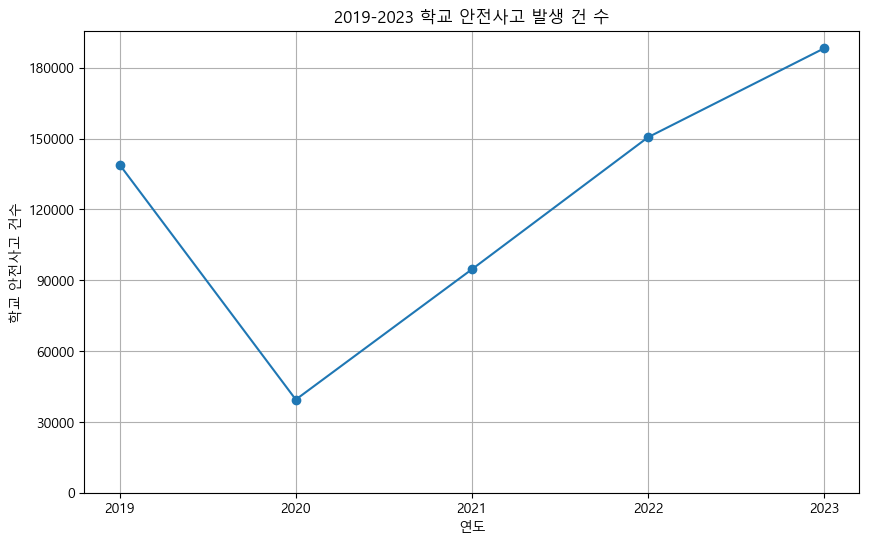

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# 시각화에서 한글 폰트 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리에 포함 (데이터 병합 및 2019년 이전에 발생한 사고 데이터 제거)
data_all = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023], ignore_index=True)
data_all['사고발생일'] = pd.to_datetime(data_all['사고발생일'])
data_all = data_all[data_all['사고발생일'].dt.year >= 2019]

# 연도별 사고 건수를 집계
yearly_accidents = data_all['사고발생일'].dt.year.value_counts().sort_index()

# 선그래프로 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_accidents.index, yearly_accidents.values, marker='o')
plt.xlabel('연도')
plt.ylabel('학교 안전사고 건수')
plt.xticks(yearly_accidents.index)
plt.yticks(range(0, max(yearly_accidents.values) + 10000, 30000))
plt.grid()
plt.title("2019-2023 학교 안전사고 발생 건 수")
plt.show()

----
현황 및 문제점 :

최근 5년간(2019년~2023년) 학교 안전사고 건수를 분석한 결과, 위 그래프와 같이 학교 내 안전사고의 발생 추이를 확인할 수 있다. 데이터에 따르면 2019년에는 약 14만 건의 안전사고가 발생했으며, 2020년에는 약 4만 건으로 크게 감소하였다. 이는 코로나19 팬데믹으로 인해, 학교 운영이 중단되거나 비대면 수업으로 전환된 영향으로 보인다. 그러나 2021년부터 학교 운영이 점차 정상화되면서, 대면 수업의 재개와 함께 사고 발생 수가 다시 증가하기 시작하였다. 2021년에는 약 9만 건, 2022년에는 약 15만 건, 2023년에는 약 19만 건의 안전사고가 보고되었다.

이러한 현황은 몇 가지 중요한 문제점을 시사한다.

1. 팬데믹 이후 학교 운영이 정상화되면서 안전사고 건수가 급격히 증가하고 있다. 이는 학교 내 안전 관리 체계가 팬데믹 이전 수준으로 회복되지 않았거나, 학생들이 학교생활에 다시 적응하는 과정에서 발생하는 문제일 수 있다.
2. 학교 내에서 발생하는 안전사고는 신체적인 부상뿐만 아니라 정신적인 트라우마를 유발할 수 있다. 특히, 사고 건수가 2020년 이후로 지속적으로 증가하는 추세를 보이고 있어, 보다 효과적인 사고 예방 대책의 마련이 시급하다.
3. 안전사고는 단순히 발생 건수만으로 평가하면 안 된다. 사고 유형, 발생 원인, 발생 장소 등을 종합적으로 분석하여, 특정 유형의 사고가 집중적으로 발생하는 경향을 파악하고, 이에 대한 구체적인 대책을 마련해야 한다.

이와 같은 문제점들을 해결하기 위해, 본 데이터 분석에서는 여러 유형별 학교 안전사고 데이터를 세부적으로 분석하여 주요 사고 패턴을 파악하고, 이를 바탕으로 효과적인 사고 예방 전략을 수립하는 것을 목표로 한다.

----

# **Ⅱ. 분석 방법**

## **데이터 수집 방법**

- 학교안전공제중앙회에서 제공하는 2019~2023년 학교안전사고 데이터를 사용하였다. 이 데이터는 각 사고의 유형, 사고 발생 장소, 발생 시간 등의 세부 정보를 포함하고 있다. 데이터는 연도별로 정리되어 있으며, .xlsx 파일 형식으로 제공되었다.
- 학교급별 학생 수와 지역별 학생 수 데이터는 한국교육학술정보원에서 제공한 지방교육재정알리미_일반교육통계 자료에서 획득하였다. 학교급별 학생 수와 지역별 학생 수에 대한 정보를 포함하고 있으며, CSV 파일 형식으로 제공되었다.

## **데이터 전처리**

- 효율적인 데이터 처리 : 학교안전공제중앙회에서 제공하는 데이터는 .xlsx 파일 형식으로 제공되었다. xlsx 파일 하나에 여러 시트가 있는 경우, pandas로 불러오는 것이 상대적으로 더 복잡하고 CSV 형식의 파일보다 불러오는 데 걸리는 시간이 더 오래 걸린다. 그래서 데이터를 좀 더 용이하게 다루기 위해, 기존 데이터에서 각 연도별 시트를 5개로 분리하여 저장한 후, 전처리 과정에서 병합하여 사용하였다.

- 최신 경향 확인을 위함 : 2019년 이전의 데이터를 제거하더라도 분석에 필요한 데이터는 충분히 수집되었다고 판단하였으며, 학교 안전사고에 대한 최신 경향을 확인하기 위해 2019년 이전의 데이터를 제거하였다.
  
- 사고 발생 장소 중 '교외'관련 데이터 일관성 유지 : 2019~2022년 데이터에서는 교외에서 발생한 사고의 사고 장소를 '교외활동'이라고 표기하였지만, 2023년 데이터에서는 '교외'라고 표기하였다. '교외'가 '교외활동'보다 더 넓은 의미로 사용되기 때문에, 데이터의 일관성을 유지하기 위해 이를 '교외'로 통일시켰다.
  
- 낙상 데이터 통합 : 2019\~2022년 데이터에서는 사고형태중 '낙상'이 '낙상-넘어짐', '낙상-떨어짐', '낙상-미끄러짐'으로 나누어져 있었다. 반면, 2023년 데이터에서는 세 종류의 낙상이 하나의 '낙상'으로 통합되어 있었다. 낙상을 분류된 상태로 유지하면, 각 낙상 유형별로 사고 원인과 결과를 세부적으로 분석할 수 있어 특정 낙상 유형에 대한 구체적인 예방책을 마련할 수 있다는 장점이 있다. 그러나, 사고 장소, 사고 당시 활동, 사고 매개물 등과 같은 정보로는 낙상의 유형을 예측하는 데 한계가 있어 오히려 더 나쁜 분석 결과를 가져올 수 있다. 따라서, 일관성을 유지하기 위해 '낙상'을 세분화하지 않고, 2023년 데이터의 형태에 맞추어 2019\~2022년 낙상 데이터를 통합하였다.
  
- 체육활동 통일 : 2019~2022년 데이터에서는 '체육활동'이 '체육수업'으로 표기되어 있었지만, 2023년 데이터에서 '체육활동'으로 표기하였다. 따라서, 좀 더 넓은 의미로 사용되는 '체육활동'으로 통일시켜 데이터의 일관성을 유지하였다.
  
- 휴식시간 및 청소시간 통합 : 2019년부터 2022년까지의 데이터에서는 사고 시간에서 휴식시간과 청소시간을 합쳐서 '휴식시간 및 청소시간'이라 표기하였지만, 2023년 데이터에서는 이에 더불에 쉬는시간까지 포함하여 '쉬는시간'으로 통합되었다. 분석의 일관성을 유지하고자 2019년부터 2022년까지의 데이터를 2023년 데이터와 동일한 기준을 통합하였다.
  
- 식사시간 통합 : 2019년 부터 2022년까지의 데이터에서 사고시간이 "점심시간" 및 "석식시간"으로 구분되어 있었다. 분석의 일관성과 간결성을 유지하기 위해, 2023년 데이터 기준에 맞춰서 이 두 항목을 더 넓은 의미의 '식사시간'으로 통합하였다. 여기서의 '식사시간'은 단순히 식사를 하는 시간 뿐 아니라, 식사 전후에 자유롭게 활동할 수 있는 시간을 의미한다.

## **데이터 분석 방법**

- 학교 안전사고 발생 건수 추세 분석 : 각 연도와 월 데이터를 바탕으로 사고 발생 건수를 집계하여 막대그래프를 통해 사고 발생 건수의 변화 추이를 시각화하였다. 더불어, 추세선을 그려 사고 발생 건수가 어떠한 추세로 변화하고 있는지 파악하였다. 추세선을 통해 사고의 전반적인 증가 또는 감소 추세를 파악하여, 장기적인 안전 관리 계획을 수립할 수 있다. 증가 추세를 보일 경우, 보다 강력한 예방 조치와 안전 교육이 필요하며, 감소 추세일 경우, 현재의 안전 관리 방안을 유지하거나 보완할 수 있다. 또한, AR 모델을 이용하여 최근 2년 간의 데이터를 바탕으로 향후 1년간의 사고 발생 건수를 예측하였다. 향후 사고 발생 건수를 예측함으로써 미래에 대비한 예방 조치를 미리 준비할 수 있을 것이다.

----

- 요일별 사고 발생 수 분석 :

  - 요일별 사고 발생 수 분석 : 사고 발생일 데이터에서 요일을 추출하여 새로운 데이터프레임을 생성하고, 각 요일별로 사고 건수를 집계하였다. 집계된 데이터를 바탕으로, 특정 요일에 사고가 집중되는지 여부를 분석하였다.

  - 사고시간-요일 별 사고 발생 분석 : 사고 시간과 사고 발생 요일 데이터를 활용하여 새로운 데이터프레임을 생성하고, 각 사고 시간과 요일별로 사고 건수를 집계하여, 특정 시간과 요일에 사고가 집중되는지 여부를 분석하였다. 히트맵을 사용하여 시각화여, 시간-요일별 사고 발생 패턴을 파악하였다.

  - 사고장소-요일 별 사고 발생 분석 : 사고 장소와 사고 발생 요일 데이터를 사용하여 새로운 데이터프레임을 생성하였다. 사고 장소와 요일별로 사고 건수를 집계하여, 특정 장소와 요일에 사고가 집중되는지 여부를 분석하였다. 장소별 사고 발생 요일 패턴을 선그래프로 시각화하여, 각 장소에서 요일별 사고 발생 특성을 파악하였다.

  - 주중, 주말의 사고 유형 비교 : 사고 발생 요일 데이터를 사용하여 주중(월~금)과 주말(토,일) 데이터를 분리하였다. 주중과 주말의 사고 유형별 사고 건수를 비교하여, 사고 유형이 주중과 주말에 따라 어떻게 다른지 분석하였다. 결과를 막대그래프로 시각화하여, 비교 분석을 통해 차이점을 파악하였다.
 

주말과 주중의 사고 발생 수에는 뚜렷한 차이가 있었지만, 이는 단순히 주말에 등교하는 인원이 적기 때문에 나타는 현상으로 보인다. 요일별 사고 발생 패턴을 분석한 결과, 특정 요일에 사고가 집중되는 명확한 패턴은 발견되지 않았다. 이는 학교 내에서 요일별로 큰 차이 없이 일관되게 사고가 발생하고 있음을 시사한다. 따라서, 요일별로 특별한 예방 조치를 취할 필요는 없어보이며, 전체적인 안전 대책을 강화하는 것이 중요하다.

 
----

- 학교 장소에 따른 사고 발생 분석 :

  - 각 장소별 사고 발생 수 : 사고 발생 장소 데이터를 활용하여, 사고가 발생한 장소별로 사고 건수를 분석하였다. 이를 통해 학교 내에서 사고가 주로 발생하는 장소를 파악하였다.

  - 사고 장소별 사고 시간 및 사고 형태 분석 : 각 장소별로 사고 시간과 사고 형태를 기준으로 히트맵을 생성하여 시각화하였다. 이를 통해 사고가 주로 발생하는 시간과 형태를 한눈에 파악할 수 있도록 하였다.

  - 사고 장소별 사고형태 및 사고 당시 활동-사고 매개물 분석 : 각 장소별로 사고형태와 사고 당시활동-사고 매개물이 주로 어떠한 형태로 나타나는지 분석하였다. 이를 통해 특정 장소에서 특정 활동 중 발생하는 사고 유형을 파악할 수 있도록 하였다.
 
이러한 분석 결과를 바탕으로, 사고 장소와 시간대별 사고 발생 패턴을 이해하고, 이를 반영한 예방 대책을 마련함으로써 안전 사고를 효과적으로 줄일 수 있을 것이다.

----

- 학교급별 사고 발생 분석 :

  - 학교급별 사고 발생 건수 분석 : 각 학교급별로 사고 발생 건수를 분석하여, 각 학교급에서 얼마나 많은 사고가 발생하는지 파악할 수 있다. 하지만, 단순히 사고 발생 건수를 비교하면 인구 수의 영향을 배제할 수 없기 때문에 정확한 사고 위험성을 판단하기 어렵다. 이 경우, 단순히 발생 건수를 비교하는 것보다 인구 대비 사고 발생률을 비교하는 것이 더 적절하다고 판단하여 인구 대비 사고 발생률을 추가적으로 분석하였다.

  - 학교급별 인구 대비 사고 발생률 분석 : 각 학교급별로 인구 대비 사고 발생률을 계산하여, 각 학교급에서 인구 대비 얼마나 많은 사고가 발생하는지 파악하였다.

  - 학교급별 사고 시간대 분석 : 각 학교급별로 사고가 주로 발생하는 시간대를 원그래프로 시각화하여, 각 학교급에서 사고가 많이 발생하는 시간대를 파악하였다.
 
이러한 분석 결과를 바탕으로, 각 학교급에 맞는 맞춤형 안전 대책을 마련하고, 이를 통해 안전 사고를 효과적으로 줄일 수 있을 것으로 기대한다.


----

- 계절별 사고 발생 패턴 분석 : 계절별로 사고 발생 패턴이 어떻게 다른지 분석하였다. 이를 위해 각 사고 데이터를 계절별로 분류하고, 계절별 사고 발생 건수를 집계하였다. 또한, 사고 형태, 사고 부위, 사고 당시 활동 등 다양한 관점에서 계절별 사고 패턴을 분석하였다.

- 계절별로 사고가 발생하는 시간을 분석하여, 특정 시간대에 사고가 집중되는 지 확인하였다. 이를 통해 사고가 자주 발생하는 시간을 중심으로 예방 대책을 마련할 수 있다.

- 계절별로 주로 발생하는 사고 형태를 분석하여, 각 계절마다 어떤 유형의 사고가 많이 발생하는지 파악하고, 그에 맞는 예방 대책을 마련할 수 있을 것으로 기대된다.

- 연관 분석을 통해 계절별로 주로 발생하는 사고 형태와 사고 부위, 사고 당시 활동 간의 관계를 파악하였다. 이를 통해 각 계절마다 어떠한 패턴으로 사고가 많이 발생하는지 알 수 있다.


---

- 지역과 사고 발생 수의 관계 분석 :

  - 지역별 성별 사고 건수 분석 : 사고자 성별 데이터를 활용하여 각 지역별로 성별 사고 건수를 분석하여, 각 지역에 성별에 따라 사고가 얼마나 발생하는지 파악하였다.

  - 지역별 전체 학생 수와 사고 수 비교 : 각 지역별 전체 학생 수는 막대그래프로 나타내고, 해당 지역의 학교 안전사고 발생 수는 남녀를 구분하여 선그래프로 나타내었다. 이를 통해, 전체 학생 수에 따른 성별 사고 발생 수의 경향을 분석하였다.

  - 각 지역의 전체 학생 수와 사고 수 간의 상관 관계 분석 : 각 지역의 전체 학생 수와 사고 수 간의 상관 관계를 분석하여, 학생 수가 사고 발생에 미치는 영향을 파악하였다. 이 과정에서 OLS 회귀선을 그려, 학생 수가 사고 수에 미치는 영향을 시각적으로 확인하였다.
 
이 분석을 통해 각 지역의 학교 안전 사고 발생 패턴을 파악함으로써, 보다 효과적인 사고 예방 전략을 수립할 수 있다. 지속적인 데이터 분석과 모니터링을 통해 안전 대책을 개선해 나가야 하며, 이를 통해 학교 내 안전 사고를 최소화 할 수 있을 것이다.

----

# **Ⅲ. 분석**

## **데이터 전처리**

In [18]:
# 데이터 전처리
# 데이터 병합과 2019년 이전 데이터 제거는 앞서 '현황 및 문제점'에서 진행하였다.

data_all['사고장소'] = data_all['사고장소'].replace('교외활동','교외')
data_all['사고형태'] = data_all['사고형태'].replace(['낙상-떨어짐','낙상-넘어짐','낙상-미끄러짐'],'낙상')
data_all['사고시간'] = data_all['사고시간'].replace('체육수업','체육활동')
data_all['사고시간'] = data_all['사고시간'].replace('휴식시간 및 청소시간', '쉬는시간')
data_all['사고시간'] = data_all['사고시간'].replace({'점심시간':'식사시간', '석식시간':'식사시간'})

----
데이터 전처리에 대한 내용은 앞선 "Ⅱ. 분석 방법-데이터 전처리"에서 설명하였다.

----

## **학교 안전사고 발생 건수 추세 분석**

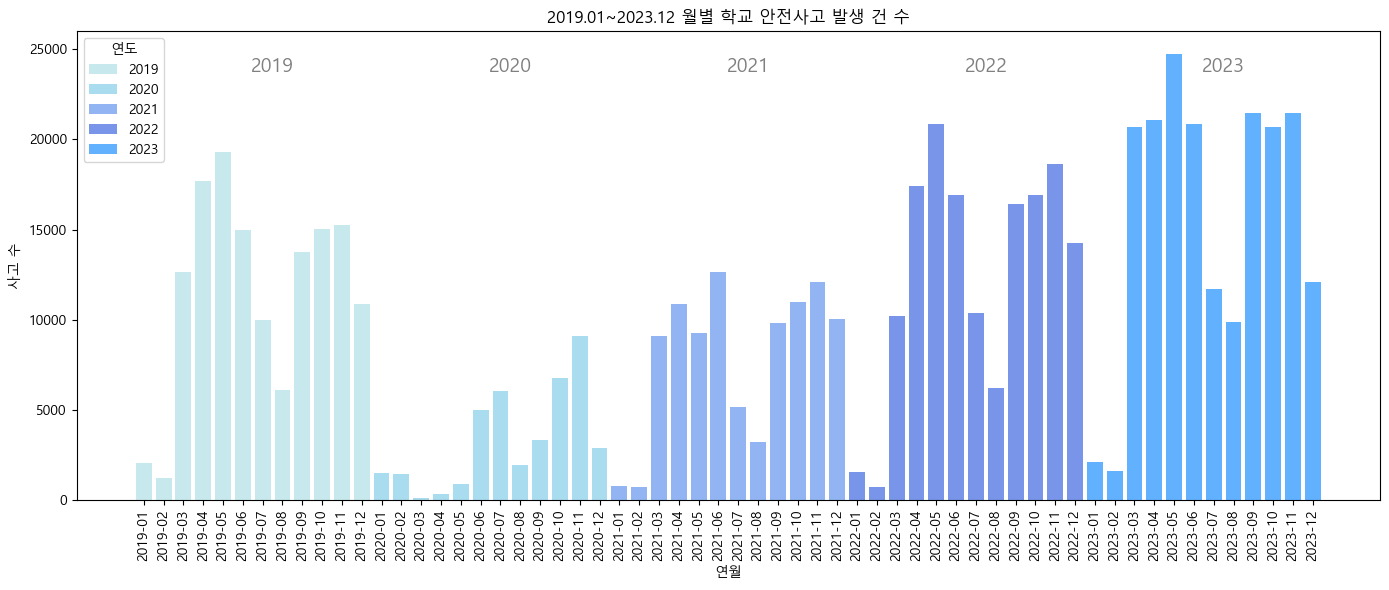

In [21]:
import numpy as np

date_df = pd.DataFrame()

# 기존 데이터에서 연도와 월 추출
date_df['연도'] = data_all['사고발생일'].dt.year
date_df['월'] = data_all['사고발생일'].dt.month

monthly_accidents = date_df.groupby(['연도', '월']).size().reset_index(name='사고 수')

# 연도와 월을 기준으로 정렬
monthly_accidents['연월'] = monthly_accidents['연도'].astype(str) + '-' + monthly_accidents['월'].astype(str).str.zfill(2)
monthly_accidents.sort_values(by='연월', inplace=True)

# 시각화 할 때 사용할 색 설정
colors = ['powderblue', 'skyblue', 'cornflowerblue', 'royalblue', 'dodgerblue','mediumblue']

plt.figure(figsize=(14, 6))

#2019.01 ~ 2023.12 의 막대그래프 시각화
for i, year in enumerate(monthly_accidents['연도'].unique()):
    data_year = monthly_accidents[monthly_accidents['연도'] == year]
    plt.bar(data_year['연월'], data_year['사고 수'], color=colors[i % len(colors)], alpha=0.7, label=year)

plt.title('2019.01~2023.12 월별 학교 안전사고 발생 건 수')
plt.xlabel("연월")
plt.ylabel("사고 수")
plt.xticks(rotation=90)
plt.legend(title='연도')

# 2019, 2020, 2021, 2022, 2023 을 상단에 표시하여 구분이 잘 되도록 하기 위해, text 생성
for i, year in enumerate(monthly_accidents['연도'].unique()):
    plt.text(i*12+6.5, max(monthly_accidents['사고 수']) * 0.96, str(year), ha='center', fontsize=14, color='gray')

plt.tight_layout()
plt.show()

----
위 그래프는 2019년 1월부터 2023년 12월까지 발생한 월별 사고 발생 건수 변화 추이를 확인하기 위해 막대그래프로 시각화한 것이다.<br>
매년 방학 기간인 1월과 2월, 7월과 8월에 사고 발생 수가 적게 나타나는 경향을 확인할 수 있다.

----

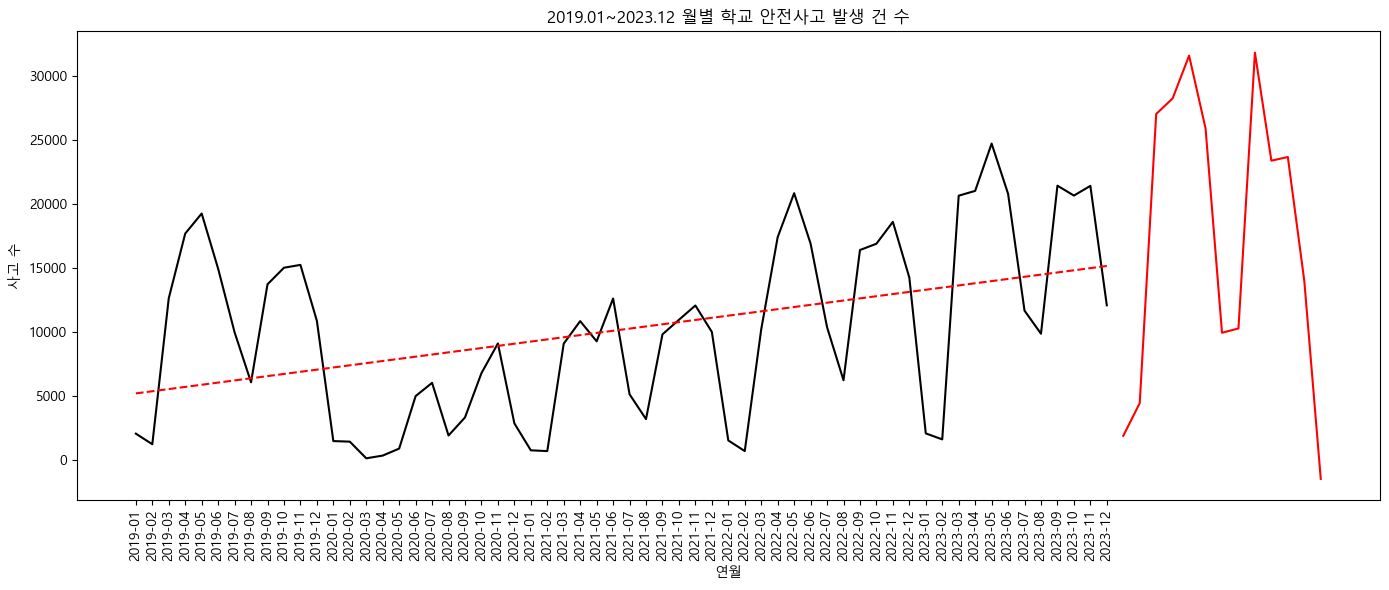

In [23]:
from statsmodels.tsa.ar_model import AutoReg

plt.figure(figsize=(14, 6))

plt.plot(monthly_accidents['연월'], monthly_accidents['사고 수'], color='black', linestyle='-')

plt.title('2019.01~2023.12 월별 학교 안전사고 발생 건 수')
plt.xlabel("연월")
plt.ylabel("사고 수")
plt.xticks(rotation=90)

#추세선 그리기
months = np.arange(len(monthly_accidents))
z = np.polyfit(months, monthly_accidents['사고 수'], 1)
p = np.poly1d(z)
plt.plot(monthly_accidents['연월'], p(months), "r--", label='추세선')

# AR Model 에 fit 하는 코드
model = AutoReg(monthly_accidents['사고 수'], lags=24)
model_fit = model.fit()

start = len(monthly_accidents)
end = len(monthly_accidents) + 12
predictions = model_fit.predict(start=start, end=end, dynamic=False)

plt.plot(predictions, color='red', label='Predictions')

plt.tight_layout()
plt.show()

----
위 그래프는 앞선 월별 사고 발생 수에 대한 막대그래프를, 사고 발생 경향을 더 쉽게 확인하기 위해 선그래프로 나타낸 것이다. 더불어, 추세선을 추가하여 사고 발생 건수가 어떻게 변하고 있는지 파악하였다. 그 결과 추세선이 우상향으로 그려졌는데, 그 이유는 코로나19 팬데믹 시기인 2020년에 급격히 사고 발생 수가 감소한 이후, 사고 발생 수가 매년 꾸준히 증가하고 있기 때문이라고 볼 수 있다.

또한, AR 모델을 이용하여 최근 2년 간의 데이터를 바탕으로 향후 1년간의 사고 발생 건수를 예측하는 그래프를 그린 결과, 이후 1년 동안에도 사고 발생 수가 늘어날 것이라는 예측 결과가 나왔다. 이러한 예측 모델을 통해 향후 사고 발생 건수를 예측함으로써, 사고 발생 가능성이 높은 시기에 대한 대비책을 미리 마련할 수 있다. 예를 들어, 사고 발생이 예상되는 시기에 인력을 추가 배치하거나, 필요한 안전 장비를 미리 확보하여 사고 발생을 줄일 수 있을 것이다.

----

## **요일별 사고 발생 수 분석**

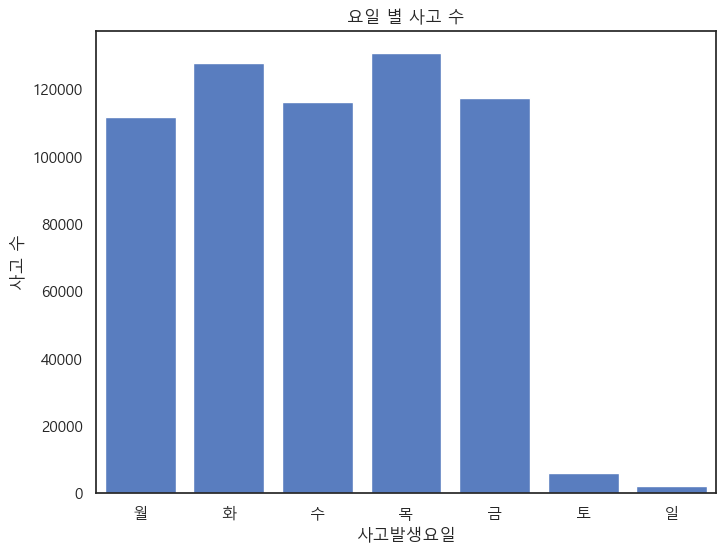

In [26]:
import seaborn as sns

week = data_all.groupby(['사고발생요일']).size().reset_index(name="사고 수")

# 월 화 수 목 금 토 일 순으로 정렬하기 위함
day_order = ['월','화','수','목','금','토','일']

week['사고발생요일'] = pd.Categorical(week['사고발생요일'], categories=day_order, ordered=True)
week = week.sort_values('사고발생요일')

sns.set_theme(style='white', palette='muted', font='Malgun Gothic')

plt.figure(figsize=(8,6))
sns.barplot(x=week['사고발생요일'], y=week['사고 수'])
plt.title("요일 별 사고 수")
plt.show()

----
주중(월~금)은 학교에 가는 날로, 사고 발생 수가 일정하게 높게 나타난다.<br>
주말(토,일)은 학교에 가지 않는 날로, 사고 발생 수가 현저히 낮게 나타난다.

주중에는 대부분의 학생들이 학교에 있기 때문에 사고가 발생할 가능성이 높다. 반면, 주말에는 학생들이 학교에 없거나 학교에 머무는 시간이 적어 사고 발생 빈도가 현저히 낮아진다.

----

사고발생요일,월,화,수,목,금,토,일
사고시간,,,,,,,
기숙사생활,302,359,331,336,155,107,321
기타,3555,4039,4024,3991,3808,969,357
등하교,6137,6149,6288,6156,5919,63,20
수업시간,15617,17513,16302,17365,15369,1242,93
쉬는시간,16819,18727,16276,18478,15706,78,101
식사시간,20625,22917,20091,22803,20034,69,60
체육활동,41731,48088,41076,48818,40444,118,88
특별활동,3622,5110,6046,5724,5816,1071,366
학교행사,3376,4901,5735,6999,9993,2284,883


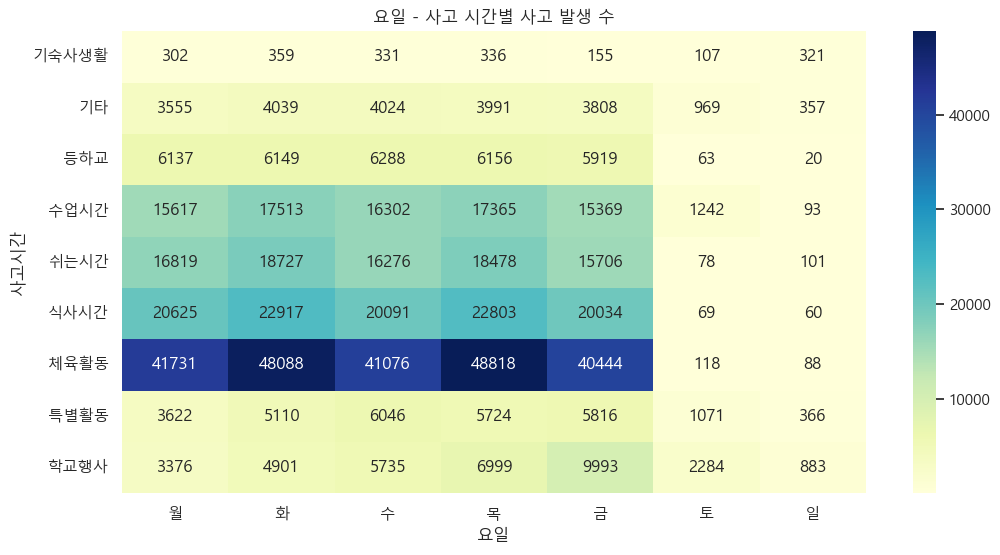

In [28]:
# 요일 - 시간별 사고 발생 분석
time_week = data_all.groupby(['사고시간', '사고발생요일']).size().unstack().fillna(0)
time_week = time_week.reindex(columns=day_order)

display(time_week)

# 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(time_week, cmap='YlGnBu',fmt='d', annot=True)
plt.title("요일 - 사고 시간별 사고 발생 수")
plt.xlabel("요일")
plt.ylabel("사고시간")
plt.show()

----
위 히트맵을 보면, 체육활동 시간에 사고가 가장 많이 발생함을 알 수 있다.

또한, 식사시간, 수업시간, 쉬는 시간 등에서도 사고가 빈번하게 발생하는 것으로 나타난다.

----

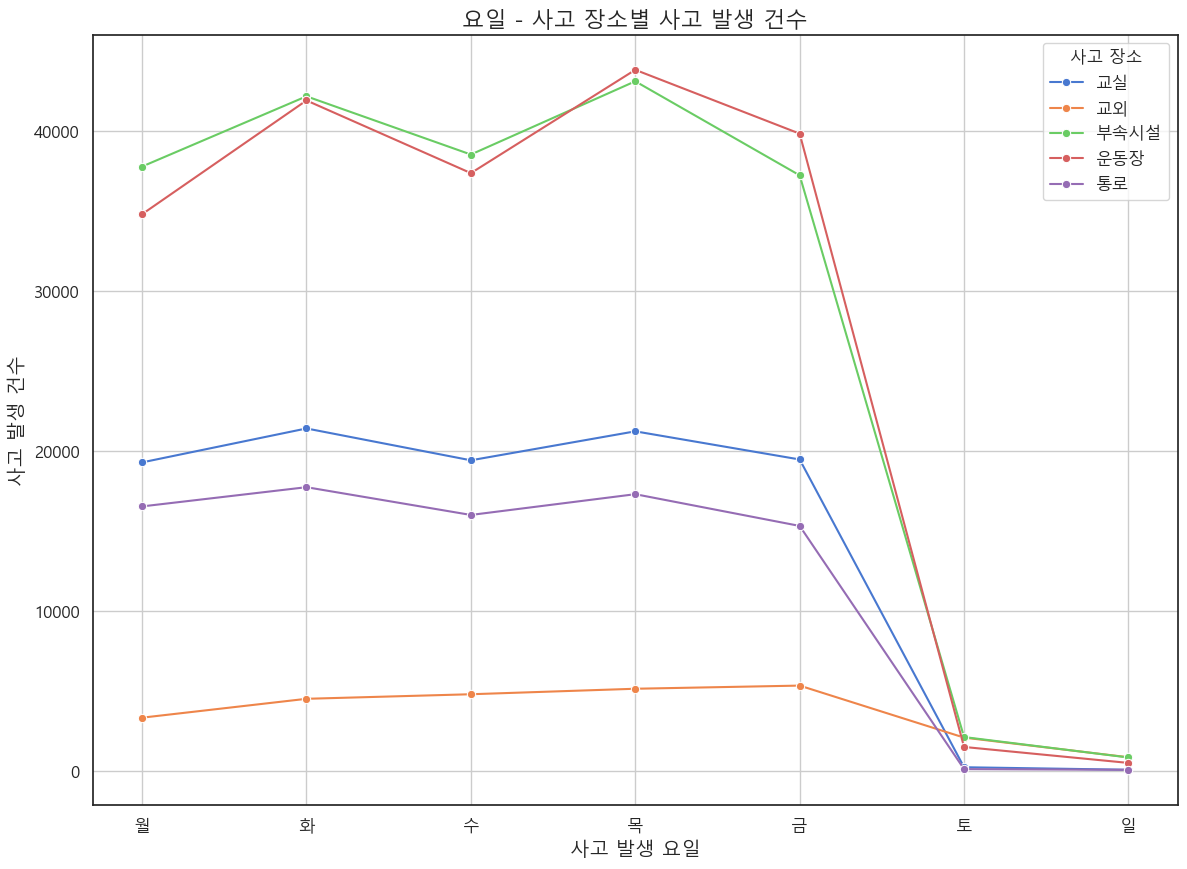

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 사고 장소별 요일별 사고 건수 집계
place_week = data_all.groupby(["사고장소", "사고발생요일"]).size().reset_index(name="사고 수")

# 요일 순서 지정
day_order = ['월', '화', '수', '목', '금', '토', '일']
place_week['사고발생요일'] = pd.Categorical(place_week['사고발생요일'], categories=day_order, ordered=True)

sns.set_theme(style='white', palette='muted', font='Malgun Gothic')
plt.figure(figsize=(14, 10))

# 사고 장소별로 선 그래프 생성
sns.lineplot(data=place_week, x='사고발생요일', y='사고 수', hue='사고장소', marker='o')

plt.title("요일 - 사고 장소별 사고 발생 건수", fontsize=16)
plt.xlabel("사고 발생 요일", fontsize=14)
plt.ylabel("사고 발생 건수", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='사고 장소', fontsize=12)
plt.grid(True)
plt.show()

----
사고 발생이 가장 많은 장소는 부속시설과 운동장이다. 앞선 히트맵에서 확인했듯이, 체육활동 중에 발생한 사고가 많기 때문에 체육활동을 하는 장소인 부속시설(체육관)과 운동장에서 사고 발생이 가장 많이 일어난 것으로 보인다.

교실과 통로에서도 상당히 많은 사고가 발생한다. 이는 수업 중이나 이동 중에 사고가 빈번하게 발생한다는 것을 의미한다.

요일별 각 시간과 장소에서의 사고 발생 패턴을 분석한 결과, 특정 요일에 사고가 집중되는 명확한 패턴은 발견되지 않았다. 그러나 화요일과 목요일에 상대적으로 사고가 많이 발생하는 경향이 있었다. 이러한 현상의 원인을 구체적으로 분석하기 위해서는 추가적인 데이터가 필요하다. 예를 들어, 체육 수업이 주로 특정 요일에 집중되어 있거나, 학교 행사가 특정 요일에 주로 열리는 경우 해당 요일에 사고 발생 빈도가 높아질 수 있다. 체육 수업 시간표, 학교 행사 일정 등의 추가적인 데이터가 있다면, 이러한 현상의 원인을 보다 구체적으로 파악할 수 있을 것이며, 이를 바탕으로 요일별 사고 예방 대책을 마련할 수 있을 것이다.

----

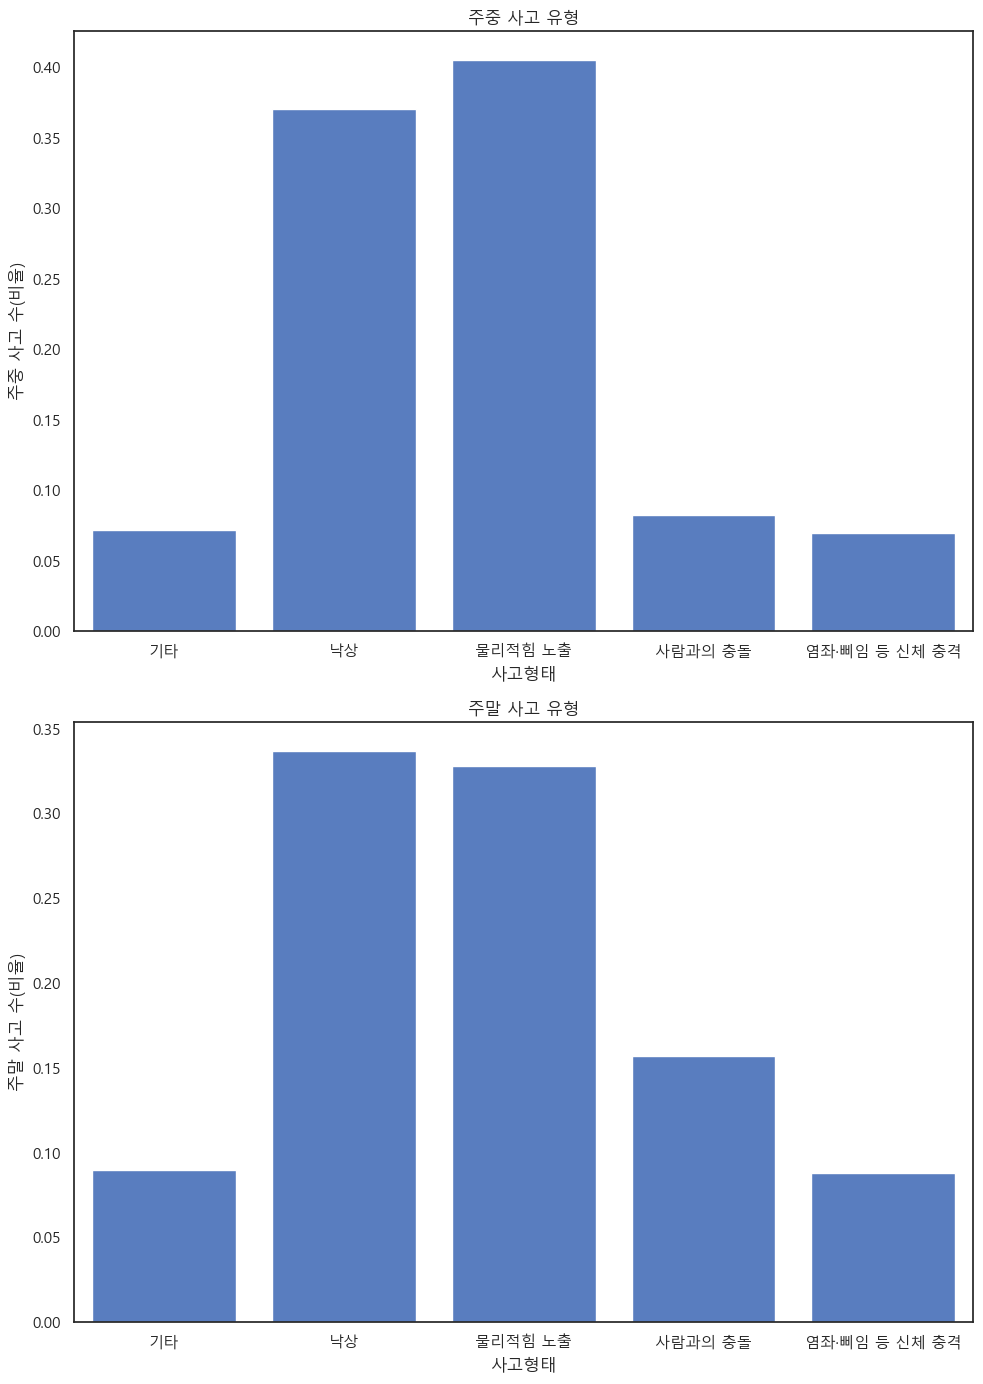

In [32]:
# 사고 유형별 주중 주말 비교
weekday = data_all[data_all['사고발생요일'].isin(['월', '화', '수', '목', '금'])]
weekend = data_all[data_all['사고발생요일'].isin(['토', '일'])]

weekday_type = weekday.groupby(['사고형태']).size().reset_index(name="주중 사고 수")
weekend_type = weekend.groupby(['사고형태']).size().reset_index(name="주말 사고 수")

# 시각화
plt.figure(figsize=(10, 14))
plt.subplot(2, 1, 1)
sns.barplot(x=weekday_type['사고형태'], y=weekday_type['주중 사고 수'] / sum(weekday_type['주중 사고 수']))
plt.ylabel('주중 사고 수(비율)')
plt.title("주중 사고 유형")

plt.subplot(2, 1, 2)
sns.barplot(x=weekend_type['사고형태'], y=weekend_type['주말 사고 수'] / sum(weekend_type['주말 사고 수']))
plt.ylabel('주말 사고 수(비율)')
plt.title("주말 사고 유형")

plt.tight_layout()
plt.show()

----
주중 사고 유형 :

- 주중에는 물리적힘 노출에 의한 사고가 가장 많이 발생한다. 이는 학생들이 수업 중 또는 쉬는 시간에 친구들과 장난을 치거나 체육 시간에 운동을 하는 도중에 부딪히거나 넘어지면서 발생하는 사고일 가능성이 높다.
- 낙상 사고가 두 번째로 많이 발생한다. 이는 학생들이 교실이나 학교 통로에서 이동 중에 미끄러지거나 계단에서 넘어지는 사고가 많다는 것을 의미한다.
- 기타 사고, 사람과의 충돌, 염좌·삠 등 신체 충격 사고는 상대적으로 적게 발생하지만 여전히 주의가 필요하다.

주말 사고 유형 :

- 주말에는 낙상 사고가 가장 많이 발생하는 것으로 나타난다. 주말에는 특별 활동이나 외부에서의 활동이 많아, 이동 중에 넘어지거나 미끄러지는 사고가 발생할 수 있다.
- 주중과 비슷하게 물리적힘 노출에 의한 사고는 여전히 많이 발생한다. 주말에도 학교 행사나 체육활동, 동아리 활동 등이 이루어지기 때문에 이러한 사고가 많이 발생할 수 있다.
- 기타 사고, 사람과의 충돌, 염좌·삠 등 신체 충격 사고가 더 높은 비율로 발생한다. 주말에는 학생들이 다양한 활동에 참여하기 때문에 이러한 현상이 나타날 수 있다.

----

### **결론**

요일별 사고 발생 건수를 분석한 결과, 특정 요일에 사고가 집중되는 명확한 패턴은 발견되지 않았다. 화요일과 목요일에 상대적으로 사고가 많이 발생하는 경향이 있었는데, 이는 체육 수업이나 학교 행사 등의 영향을 받았기 때문일 수 있다. 현재의 데이터만으로는 이러한 요소들을 고려하여 분석할 수 없으므로, 추가적인 데이터 수집과 분석이 필요하다.

부속시설과 운동장에서 사고가 가장 많이 발생하는데, 이는 두 장소에서 체육활동이 활발하게 이루어지기 때문이다. 이외에도 교실과 통로에서도 사고가 빈번하게 발생하기 때문에, 수업 중이나 이동 중 사고 예방에 힘써야 한다.

주중과 주말 모두 물리적힘 노출로 인한 사고와 낙상 사고가 가장 많이 발생하였다. 이는 학생들이 활발하게 활동하는 환경에서 많이 발생할 수 있는 사고 유형이다. 주말에 기타 사고, 사람과의 충돌, 염좌·삠 등 신체 충격 사고가 더 높은 비율로 발생하지만, 전체적으로는 주중과 유사한 형태로 사고가 발생하고 있다. 즉, 주말에는 주중보다 사고 발생 건수가 적을 뿐, 발생하는 패턴은 비슷하다는 것을 의미한다.


인사이트 :

- 전체적으로 뚜렷한 패턴이 나타나지 않았다. 이는 학교 사고가 여러 변수에 의해 발생하며, 특정한 요일에 집중되지 않음을 시사한다.
- 요일에 관계없이 체육활동 중 사고와 이동 중 사고가 빈번하게 일어난다. 이러한 사고를 예방하기 위한 구체적인 대책이 필요하다. 특히, 체육 시간에는 안전 장비 착용을 의무화하고, 교실 및 통로에서는 위험한 요소를 제거하여 안전한 이동 경로를 확보하는 것이 중요하다.
- 현재의 데이터만으로는 특정 요일에 사고가 더 많이 발생하는 이유를 명확히 분석하는 데 한계가 있다. 추가적인 데이터 수집과 분석이 필요하다.

----

## **학교 장소에 따른 사고 발생 분석**

### **각 장소별 사고 발생 수**

,사고장소,사고발생건수
0,교실,101136
1,교외,25994
2,부속시설,201897
3,운동장,199856
4,통로,83077


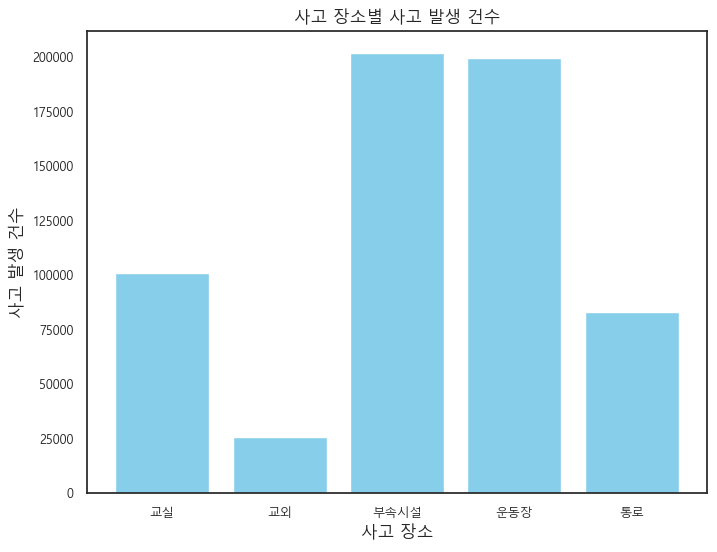

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# 사고 장소별 사고 건수 집계
acc_place = data_all.groupby("사고장소").size().reset_index(name="사고발생건수")
display(acc_place)

# 시각화 코드
plt.figure(figsize=(8, 6))
plt.bar(acc_place["사고장소"], acc_place["사고발생건수"], color='skyblue')
plt.xlabel("사고 장소")
plt.ylabel("사고 발생 건수")
plt.title("사고 장소별 사고 발생 건수")

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()

----
위 그래프를 통해 부속시설과 운동장에서 사고가 가장 많이 발생한다는 것을 알 수 있다.

이는 앞선 분석에서 얻은 결과와 일관된 결과이다.

----

### **사고 장소별 사고 시간 및 사고 형태 분석 - 데이터프레임 및 함수 생성**

In [41]:
import pandas as pd

# 기존 데이터를 그룹화하여 각 사고장소의 각 시간에서 발생하는 각 사고 형태의 수를 구하였다.
place_time = data_all.groupby(["사고장소", "사고형태", "사고시간"]).size().reset_index(name="사고발생건수")

# 사고장소별로 그룹화하고, 사고발생건수를 기준으로 내림차순 정렬
sorted_place_time = place_time.sort_values(['사고장소', '사고발생건수'], ascending=[True, False])

# 인덱스를 재설정하고, 불필요한 열 제거
sorted_place_time.reset_index(drop=True, inplace=True)
sorted_place_time.set_index(['사고장소', '사고시간', '사고형태'], inplace=True)

display(sorted_place_time)

사고발생건수
사고장소 사고시간  사고형태           
교실   수업시간  물리적힘 노출   24402
     쉬는시간  물리적힘 노출   15902
     식사시간  물리적힘 노출    8939
     수업시간  기타         7732
           낙상         7701
...                    ...
통로   특별활동  기타           34
     학교행사  사람과의 충돌      29
     특별활동  사람과의 충돌      27
     기숙사생활 물리적힘 노출      20
           기타            5

[216 rows x 1 columns]

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_type_time(df, place):
    # pivot table을 생성하고, pivot table을 heatmap으로 시각화 한다
    pivot_table = df.pivot_table(index=['사고장소', '사고시간'], columns='사고형태',
                                 values='사고발생건수', aggfunc='sum', fill_value=0)

    # heatmap 시각화 코드
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot_table.loc[place], annot=True, fmt='d', cmap='YlGnBu',annot_kws={"size":18}, cbar_kws={'shrink': 0.3})
    
    plt.title(f'{place} - 사고시간별 사고형태 Heatmap')
    plt.xlabel('사고형태')
    plt.ylabel('사고시간')

    
    plt.yticks(rotation=0)
    plt.show()

----
plot_heatmap_type_time 함수는 특정 장소에서 사고 시간과 사고 형태에 따른 사고 발생 건수를 히트맵으로 시각화하는 기능을 수행하는 함수이다.<br>
df에는 사고 데이터가 포함된 데이터프레임이, place에는 히트맵을 생성할 특정 장소의 이름이 들어간다.

----

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top5_bar_chart(df, place):
    # 피벗 테이블 생성
    pivot_table = df.pivot_table(index=['사고장소', '사고시간'], columns='사고형태',
                                 values='사고발생건수', aggfunc='sum', fill_value=0)
    
    # 선택한 장소의 데이터만 사용
    place_data = pivot_table.loc[place]
    
    # 피벗 테이블을 평탄화 (stack)
    flat_table = place_data.stack().reset_index()
    flat_table.columns = ['사고형태','사고시간', '사고발생건수']
    
    # 사고발생건수가 큰 5개 항목 선택
    top5 = flat_table.nlargest(5, '사고발생건수')
    
    # 상위 5개 항목 출력
    display(top5)
    
    # 막대그래프 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top5, x='사고형태', y='사고발생건수', hue='사고시간', palette='viridis')
    
    plt.title(f'{place} - 사고시간별 상위 5개 사고형태')
    plt.xlabel('사고형태')
    plt.ylabel('사고발생건수')
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='사고시간', fontsize=10)
    plt.show()

----
plot_top5_bar_chart 함수는 특정 장소에서 사고 시간과 사고 형태에 따른 사고 발생 건수에서 사고 발생 건수가 큰 상위 5개 항목을 선택하여 막대그래프로 시각화하는 함수이다.<br>
df에는 사고 데이터가 포함된 데이터프레임이, place에는 히트맵을 생성할 특정 장소의 이름이 들어간다.

----

### **사고 장소별 사고형태 및 사고 당시 활동-사고 매개물 분석 - 데이터프레임 및 함수 생성**

In [47]:
# 기존 데이터를 그룹화하여 각 사고장소에서 발생하는 각 사고 형태와 사고 당시 활동-사고 매개물에 의한 사고 수를 구하였다.
place_med = data_all.groupby(["사고장소","사고형태","사고당시활동","사고매개물"]).size().reset_index(name="사고발생건수")

sorted_place_med = place_med.groupby('사고장소').apply(lambda x: x.sort_values(
    '사고발생건수', ascending=False).head(10), include_groups=False)

sorted_place_med.reset_index(inplace=True)
sorted_place_med.drop(columns=['level_1'], inplace=True)
sorted_place_med.set_index(['사고장소','사고형태', '사고당시활동','사고매개물'], inplace=True)

display(sorted_place_med)

사고발생건수
사고장소 사고형태          사고당시활동   사고매개물                       
교실   물리적힘 노출       장난/놀이    가구(책상/의자/책장/탁자/침대 등)    6027
                   기타       가구(책상/의자/책장/탁자/침대 등)    3705
                   공부       가구(책상/의자/책장/탁자/침대 등)    3305
                   실험실습     날카로운 물건(칼/가위/송곳 등)      3062
     사람과의 충돌       장난/놀이    자연(사람/동물/식물 등)          2990
...                                                  ...
통로   사람과의 충돌       보행/주행    자연(사람/동물/식물 등)          2854
     물리적힘 노출       장난/놀이    건물(문/창문/바닥/벽 등)         2852
     낙상            식사/수면/휴식 건물(문/창문/바닥/벽 등)         2206
     염좌·삐임 등 신체 충격 보행/주행    건물(문/창문/바닥/벽 등)         2149
     낙상            장난/놀이    자연(사람/동물/식물 등)          1642

[50 rows x 1 columns]

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sorted_place_med.reset_index()
pivot_table = df.pivot_table(index=['사고장소', '사고형태'], columns=['사고당시활동', '사고매개물'],
                             values='사고발생건수', aggfunc='sum', fill_value=0)

def plot_heatmap_type_time_med(pivot_table, place):
    
    # 전체 pivot table에서, 입력한 place를 선택하여 place_table을 생성
    place_table = pivot_table.loc[place]
    
    # 모든 행이 0인 열은 제거하고 출력하기 위한 코드
    place_table = place_table.loc[:, (place_table != 0).any(axis=0)]

    
    # heatmap 시각화 코드
    plt.figure(figsize=(14, 6))
    sns.heatmap(place_table, annot=True, fmt='d', cmap='BuGn')
    
    plt.title(f'{place} - 상위 10개 사고형태별 사고당시활동과 사고매개물 Heatmap')
    plt.xlabel('사고당시활동과 사고매개물')
    plt.ylabel('사고형태')
    
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    
    plt.show()

----
plot_heatmap_type_time_med 함수는 특정 장소에서 사고 형태에 따른 사고 당시 활동과 사고 매개물에 의한 사고 발생 건수를 히트맵을 시각화하는 기능을 수행하는 함수이다. pivot table에서 모든 행이 0인 열을 제거한 후, heatmap으로 시각화한다.<br>
pivot_table에는 사고 데이터가 pivot table 형태로 변환된 데이터프레임이, place에는 히트맵을 생성할 특정 장소의 이름이 들어간다.

----

### **각 장소별 분석 및 시각화**

#### **교실**

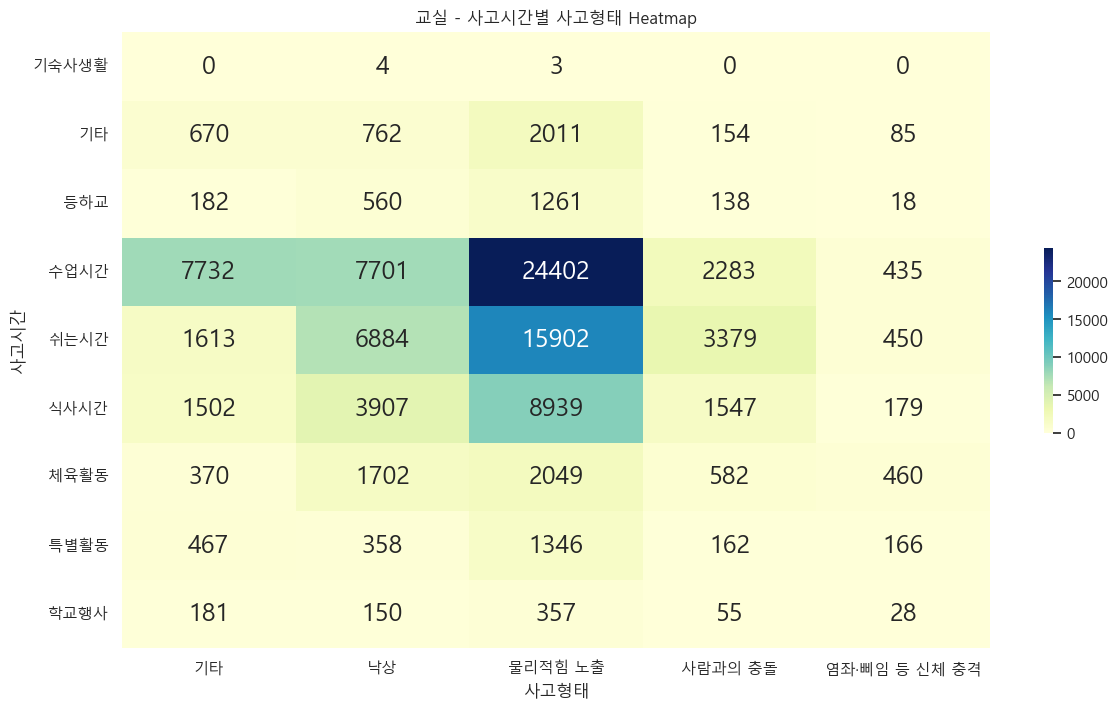

,사고형태,사고시간,사고발생건수
17,수업시간,물리적힘 노출,24402
22,쉬는시간,물리적힘 노출,15902
27,식사시간,물리적힘 노출,8939
15,수업시간,기타,7732
16,수업시간,낙상,7701


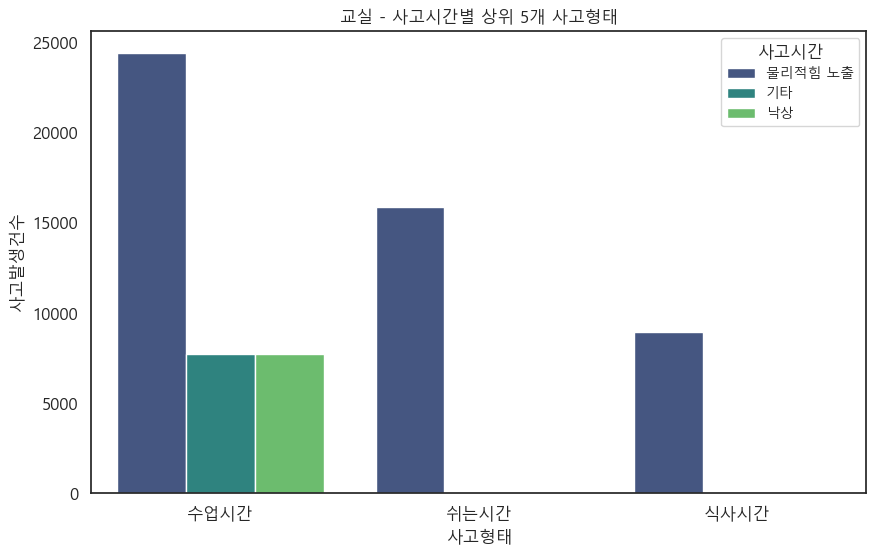

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 교실에서 발생하는 사고에 대한 분석
df = sorted_place_time.reset_index()
plot_heatmap_type_time(df, "교실")
plot_top5_bar_chart(df, '교실')

----
**교실 - 사고시간별 사고형태 분석**

위 히트맵은 교실에서의 사고 시간별 사고 형태를 시각화한 것이다. 이를 통해 다음과 같은 정보를 얻을 수 있다.

- 수업 시간에 물리적힘 노출에 의한 사고가 가장 많이 발생하였다
- 쉬는 시간과 식사 시간에도 물리적 접촉 사고가 빈번히 발생하였다.
- 낙상 사고도 상당수 발생하였는데, 주로 수업 시간과 쉬는 시간에 집중되어 있는 것으로 나타난다.

위와 같은 문제를 해결하기 위해, 다음과 같은 노력을 할 수 있다.

- 위험할 수 있는 물건을 다루어야 하는 수업 시간 전에는 그 위험성을 재차 강조하여 학생들이 경각심을 갖도록 해야 한다.
- 수업 중 학생들 간에 물리적 접촉을 줄일 수 있는 방안을 마련해야 한다.
- 쉬는 시간과 식사 시간 동안에 관리·감독을 강화해야 한다.
- 낙상 사고를 예방하기 위해 교실 내 바닥 상태를 주기적으로 점검해야 한다.

----

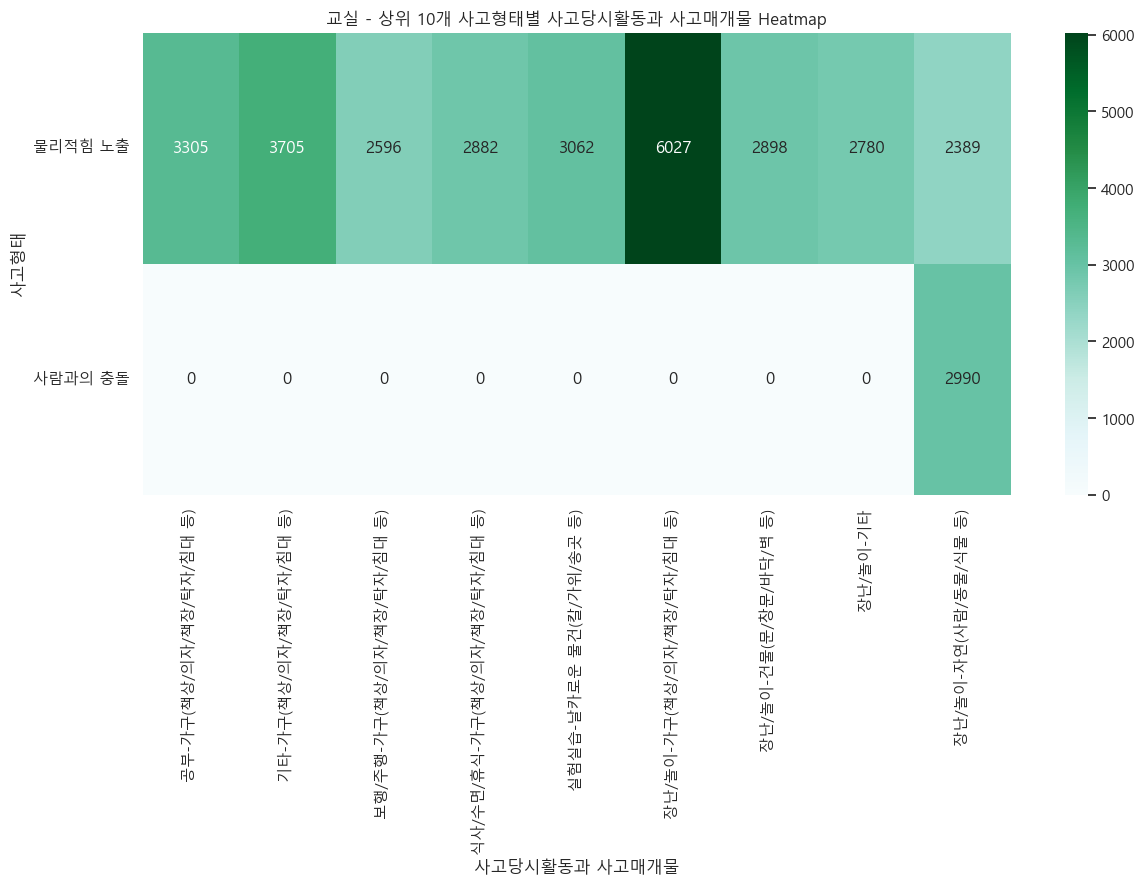

In [54]:
# 교실에서 발생하는 사고에 대한 분석
plot_heatmap_type_time_med(pivot_table, "교실")

----
**교실 - 사고형태별 사고활동과 사고매개물 분석**

위 히트맵은 교실에서의 사고 형태별 사고 활동과 사고 매개물을, 사고 발생 수가 많은 상위 10개의 사고 유형만을 시각화한 것이다. 이를 통해 다음과 같은 정보를 얻을 수 있다.

- 물리적힘 노출에 의한 사고는 주로 가구(책상/의자/책장/탁자 등)에 의해 발생하며, 특히 장난/놀이 중에 가장 많이 발생하였다.
- 사람과의 충돌 사고는 장난/놀이 중 많이 발생하였다.
- 상당수의 사고가 실험실습 중 날카로운 물건에 의해 발생하였다.

위와 같은 문제를 해결하기 위해, 다음과 같은 노력을 할 수 있다.

- 교실 내 가구 배치와 상태 점검을 통해 물리적힘 노출 사고를 줄여야 한다. 예를 들어, 가구의 모서리 등과 같이 다치기 쉬운 곳에 보호대 등을 설치하여 안전성을 높일 수 있을 것이다.
- 실험실습 중 안전 수칙을 철저히 지키도록 교육해야 한다.
- 학생들이 장난/놀이 중 안전하게 활동할 수 있도록 지도하고, 감독을 강화해야 한다

----

----

#### **교외**

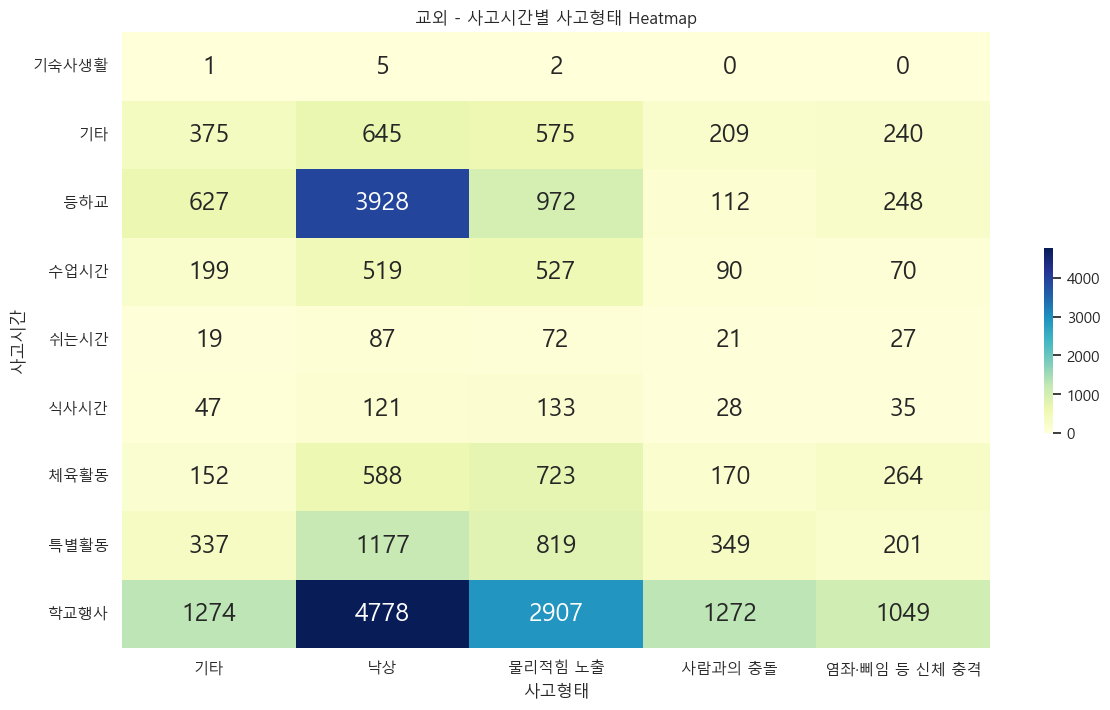

,사고형태,사고시간,사고발생건수
41,학교행사,낙상,4778
11,등하교,낙상,3928
42,학교행사,물리적힘 노출,2907
40,학교행사,기타,1274
43,학교행사,사람과의 충돌,1272


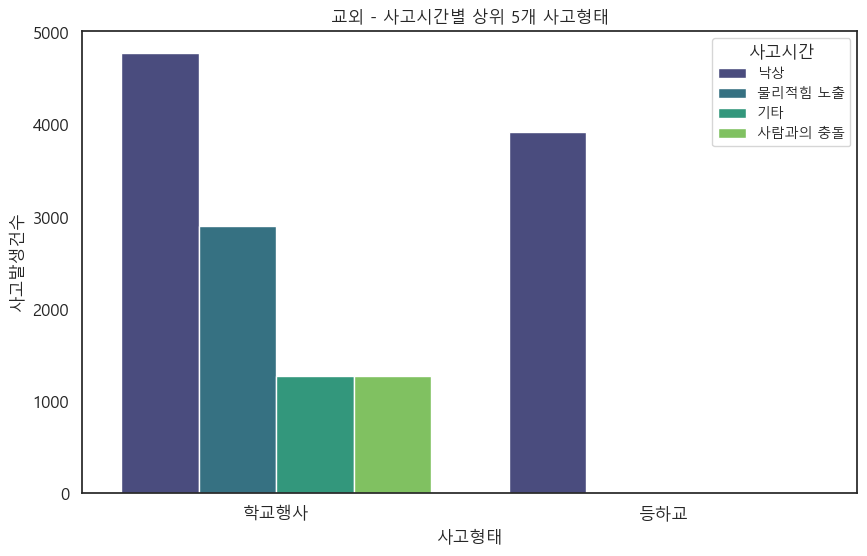

In [58]:
# 교외활동에서 발생하는 사고에 대한 분석
df = sorted_place_time.reset_index()
plot_heatmap_type_time(df, "교외")
plot_top5_bar_chart(df, '교외')

----
**교외 - 사고시간별 사고형태 분석**

위 히트맵은 교외에서의 사고 시간별 사고 형태를 시각화한 것이다. 이를 통해 다음과 같은 정보를 얻을 수 있다.

- 등하교 중에는 낙상 사고가 가장 많이 발생하였다.
- 학교 행사 중에도 낙상 사고가 가장 많이 발생하였고, 물리적힘 노출에 의한 사고도 상당수 발생하였다.
- 특별활동 시간과 기타 시간에도 꽤 많은 사고가 발생하였다.

위와 같은 문제를 해결하기 위해, 다음과 같은 노력을 할 수 있다.

- 등하교 시간 동안 학생들의 낙상 사고를 방지하기 위해, 미끄럼 방지 포장재 등을 사용하여 등하굣길의 안전을 강화해야 한다. 또한, 위험 요소가 많은 길로는 다니지 못하도록 지도해야 한다.
- 학교 행사 및 특별활동 동안 관리·감독을 강화해야 한다.
- 기타 시간 동안의 사고 예방을 위해 주의를 기울여야 한다.

----

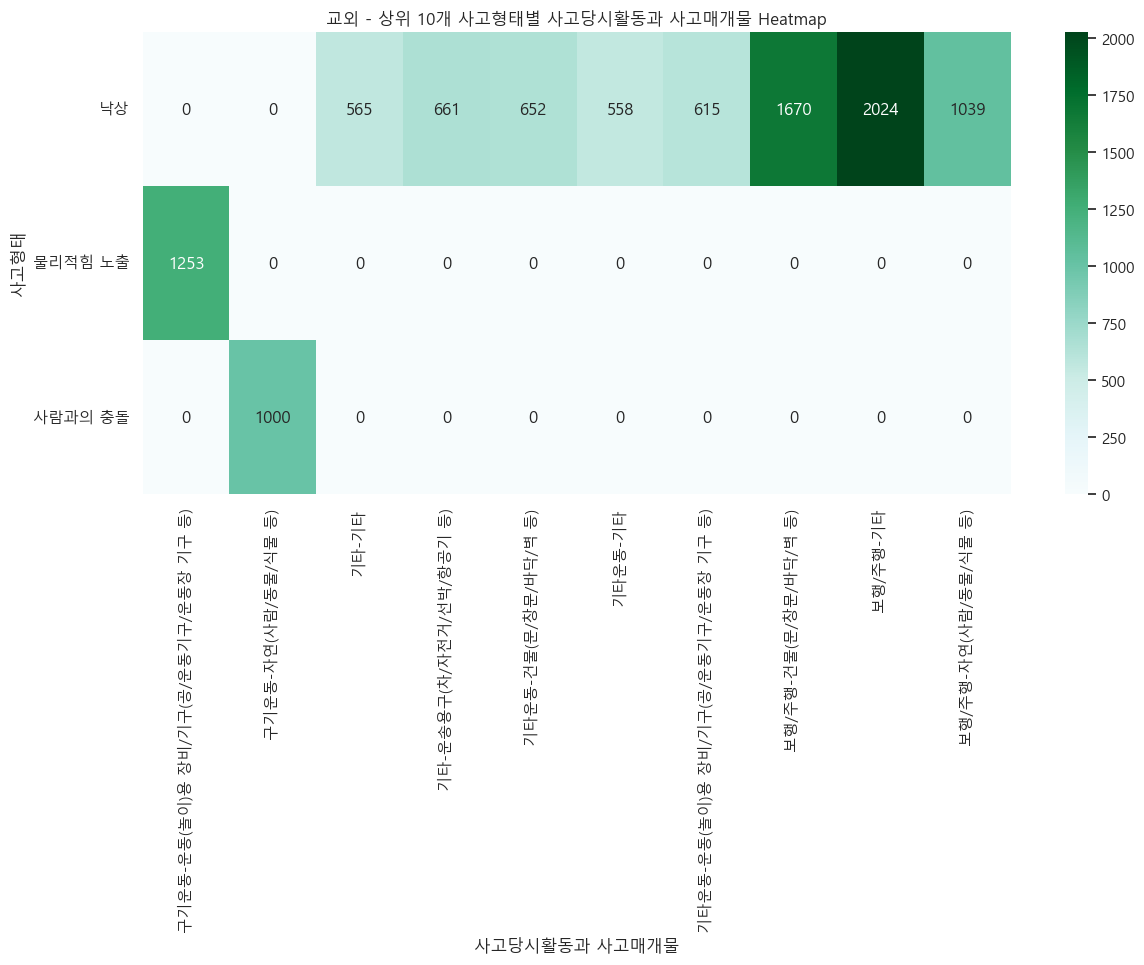

In [60]:
# 교외활동에서 발생하는 사고에 대한 분석
plot_heatmap_type_time_med(pivot_table, "교외")

----
**교외 - 사고형태별 사고활동과 사고매개물 분석**

위 히트맵은 교외에서의 사고 형태별 사고 활동과 사고 매개물을, 사고 발생 수가 많은 상위 10개의 사고 유형만을 시각화한 것이다. 이를 통해 다음과 같은 정보를 얻을 수 있다.

- 교외에서의 낙상 사고는 보행/주행 중 가장 많이 발생하며, 운동 중에도 빈번하게 발생한다.
- 교외에서 물리적힘 노출에 의한 사고는 구기운동 중 빈번히 발생하였다.
- 사람과의 충돌 사고 역시 운동 중에 많이 발생하였다.

위와 같은 문제를 해결하기 위해, 다음과 같은 노력을 할 수 있다.

- 운동 및 놀이 시 안전사고를 예방하기 위해, 운동 전 충분한 스트레칭 및 안전장비 착용을 의무화해야 한다.
- 운동기구의 정기적인 점검과 안전 지도를 강화해야 한다.

----

----

#### **부속시설**

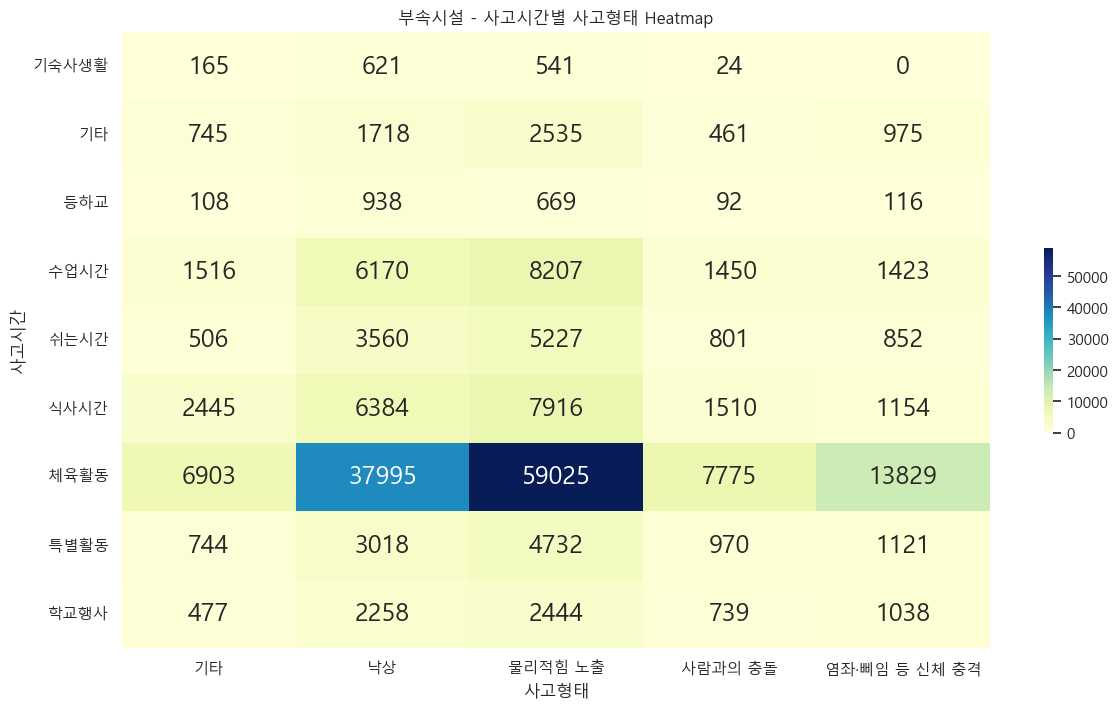

,사고형태,사고시간,사고발생건수
32,체육활동,물리적힘 노출,59025
31,체육활동,낙상,37995
34,체육활동,염좌·삐임 등 신체 충격,13829
17,수업시간,물리적힘 노출,8207
27,식사시간,물리적힘 노출,7916


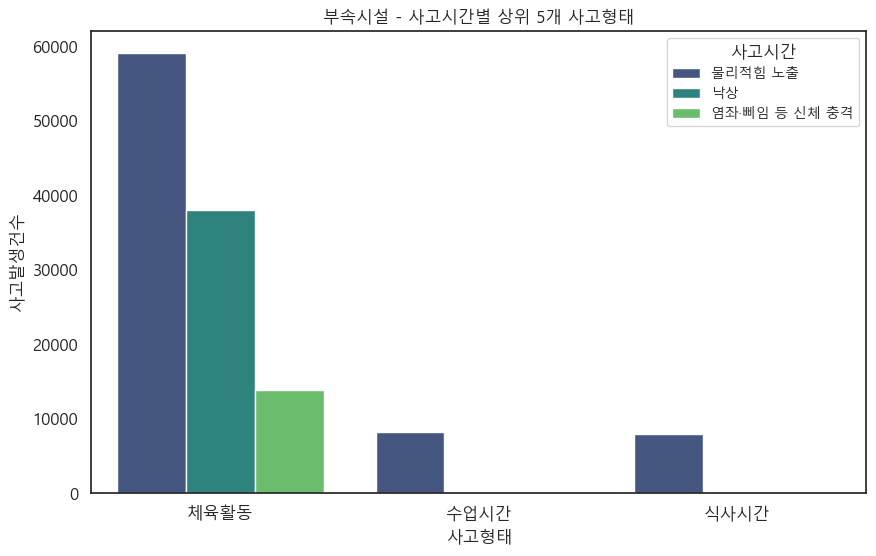

In [64]:
# 부속시설에서 발생하는 사고에 대한 분석
df = sorted_place_time.reset_index()
plot_heatmap_type_time(df, "부속시설")
plot_top5_bar_chart(df, '부속시설')

----
**부속시설 - 사고시간별 사고형태 분석**

위 히트맵은 부속시설에서의 사고 시간별 사고 형태를 시각화한 것이다. 이를 통해 다음과 같은 정보를 얻을 수 있다.

- 부속시설에서는 체육활동 중 물리적힘 노출에 의한 사고와 낙상 사고가 많이 발생하였다.
- 체육활동뿐만 아니라 다른 여러 시간에도 낙상 및 물리적힘 노출에 의한 사고가 주로 발생하였다.

위와 같은 문제를 해결하기 위해, 다음과 같은 노력을 할 수 있다.

- 체육활동 시작 전, 학생들의 안전 교육에 특히 더 많은 노력을 기울여야 한다.
- 체육활동 시 안전장비 착용을 의무화해야 한다.
- 각 부속시설의 시설물에 대한 점검을 주기적으로 해야 하고, 부속시설 이용시 학생들에 대한 감독을 강화해야 한다.

----

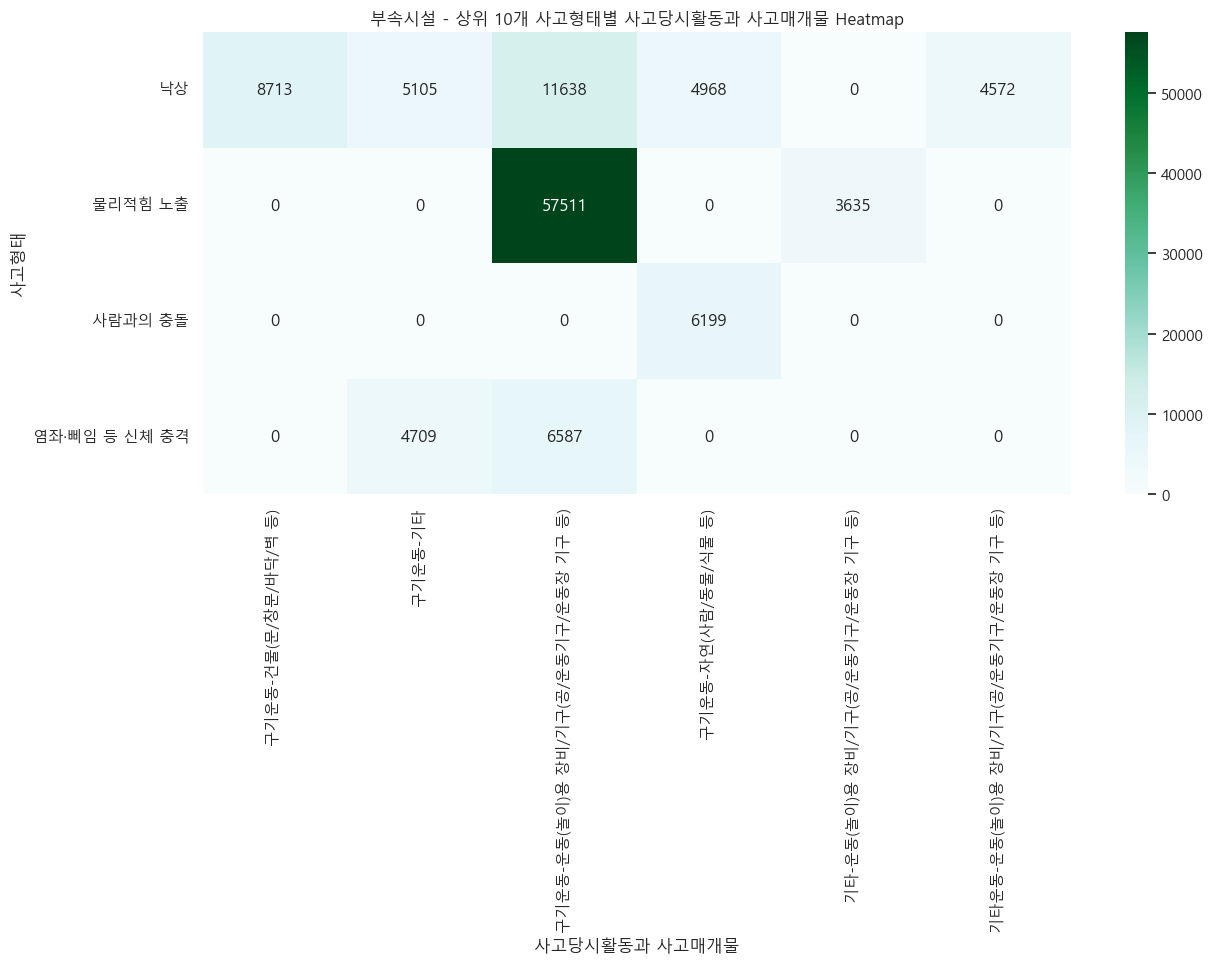

In [66]:
# 부속시설에서 발생하는 사고에 대한 분석
plot_heatmap_type_time_med(pivot_table, "부속시설")

----
**부속시설 - 사고형태별 사고활동과 사고매개물 분석**

위 히트맵은 부속시설에서의 사고 형태별 사고 활동과 사고 매개물을, 사고 발생 수가 많은 상위 10개의 사고 유형만을 시각화한 것이다. 이를 통해 다음과 같은 정보를 얻을 수 있다.

- 낙상사고는 주로 구기운동 및 운동(놀이)용 장비에 의해 발생하는 것으로 나타난다.
- 물리적 접촉 사고는 대부분 구기운동 중에 발생하였다.
- 염좌·베임 등 신체 충격 사고 역시도 운동에 의해 주로 발생하는 것으로 보인다.

위와 같은 문제를 해결하기 위해, 다음과 같은 노력을 할 수 있다.

- 부속시설 내의 운동 관련 시설의 안전 기준을 재점검하고, 정기적으로 안전 점검을 실시해야 한다.
- 구기운동과 기타 운동 시 적절한 지도와 안전 교육을 실시해야 한다.
- 운동(놀이)용 장비의 상태를 주기적으로 점검하고, 안전하게 사용할 수 있도록 안전교육을 주기적으로 실시해야 한다.

----

----

#### **운동장**

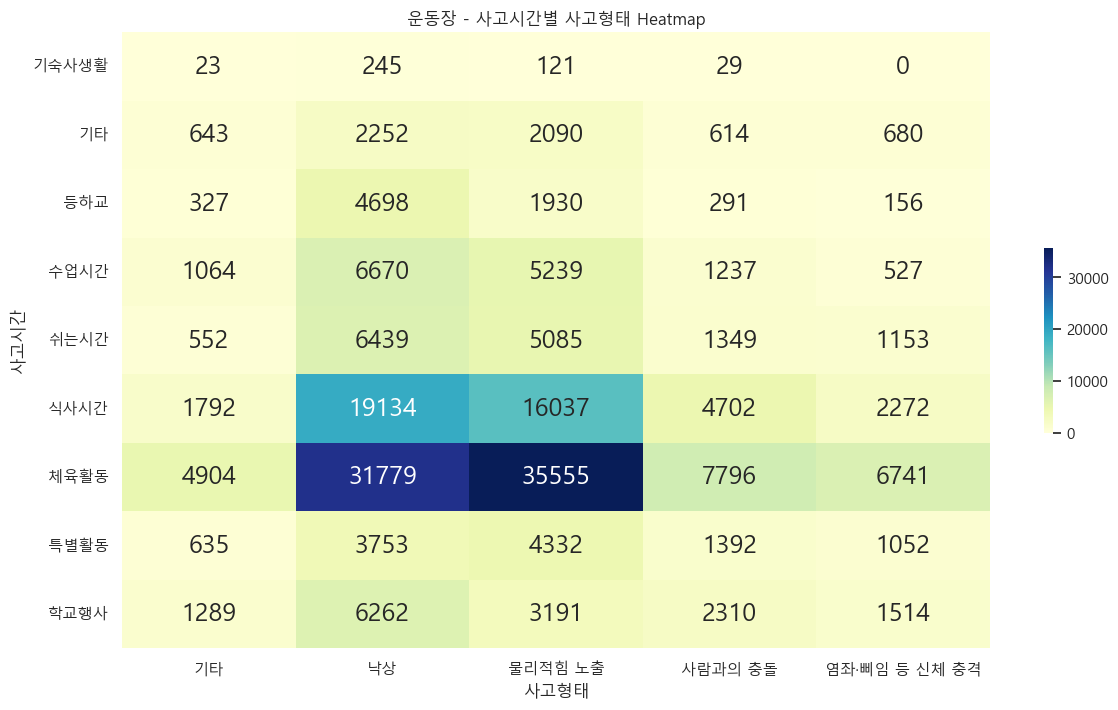

,사고형태,사고시간,사고발생건수
32,체육활동,물리적힘 노출,35555
31,체육활동,낙상,31779
26,식사시간,낙상,19134
27,식사시간,물리적힘 노출,16037
33,체육활동,사람과의 충돌,7796


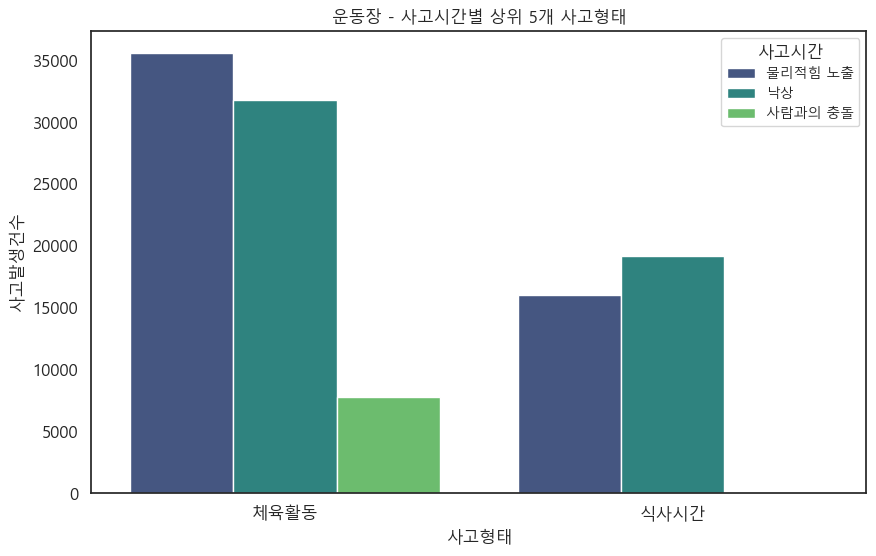

In [70]:
# 운동장에서 발생하는 사고에 대한 분석
df = sorted_place_time.reset_index()
plot_heatmap_type_time(df, "운동장")
plot_top5_bar_chart(df, '운동장')

----
**운동장 - 사고시간별 사고형태 분석**

위 히트맵은 운동장에서의 사고 시간별 사고 형태를 시각화한 것이다. 이를 통해 다음과 같은 정보를 얻을 수 있다.

- 부속시설과 마찬가지로 체육활동 시간에 가장 많은 사고가 발생하였다. 특히, 낙상과 물리적힘 노출에 의한 사고가 가장 많이 발생한 것은 부속시설에서 발생하는 사고 패턴과 비슷하다.
- 식사 시간에도 낙상 사고와 물리적힘 노출에 의한 사고가 빈번하게 발생하였다. 이는 식사 전후의 자유 시간에 운동장에서 운동을 하는 학생들이 많기 때문인 것으로 파악된다.
- 부속시설과 마찬가지로, 체육활동에 국한되지 않고 다양한 시간에 사고가 빈번하게 발생함을 알 수 있다.

위와 같은 문제를 해결하기 위해, 다음과 같은 노력을 할 수 있다.

- 체육활동 동안 학생들의 안전을 강화하기 위한 지도를 해야 한다.
- 식사 전후의 자유 시간 동안 운동장의 관리 감독을 강화해야 한다.
- 운동장에서 진행하는 학교 행사 동안 사고 예방을 위해 주의를 기울여야 한다.

----

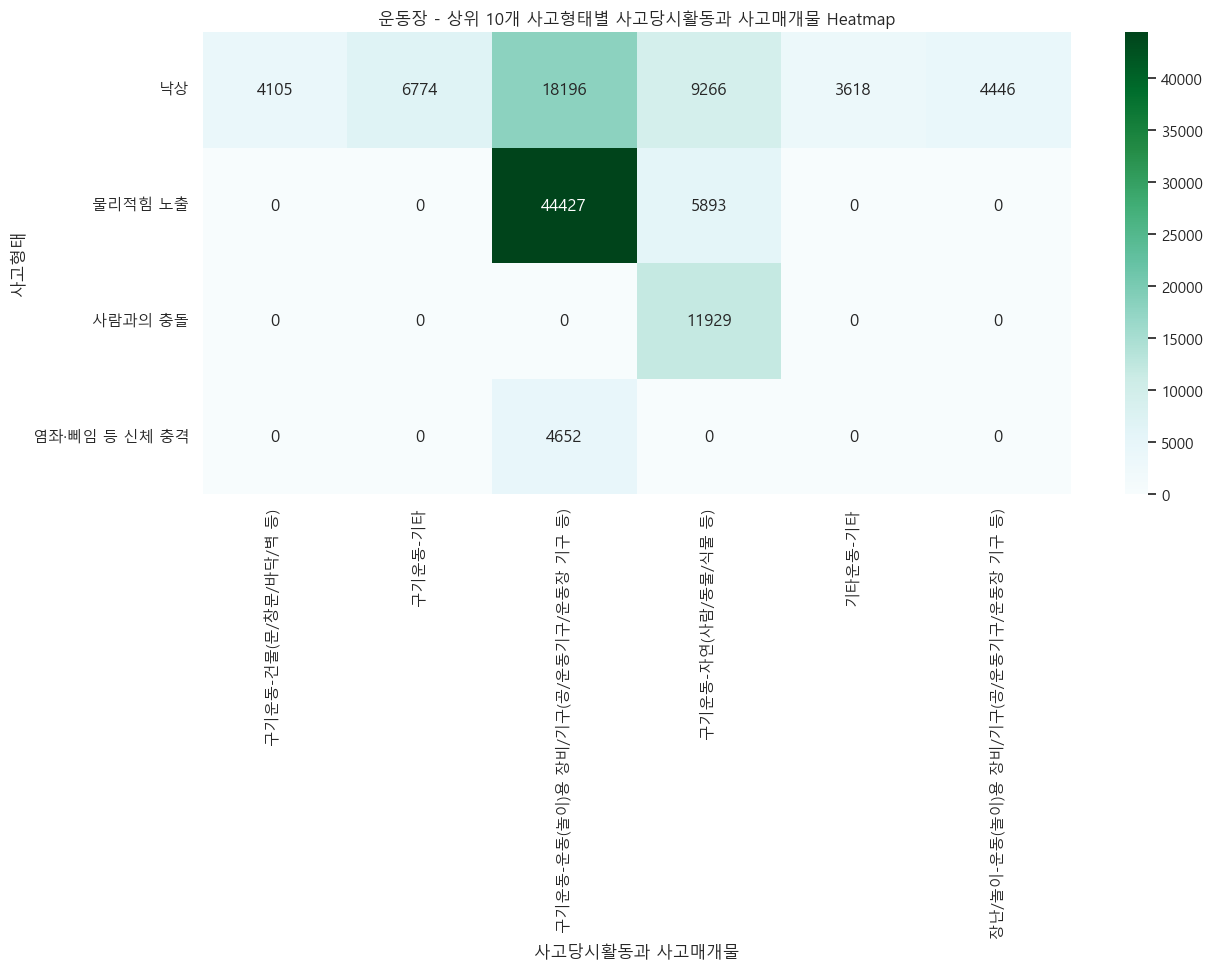

In [72]:
# 운동장에서 발생하는 사고에 대한 분석
plot_heatmap_type_time_med(pivot_table, "운동장")

----
**운동장 - 사고형태별 사고활동과 사고매개물 분석**

위 히트맵은 운동장에서의 사고 형태별 사고 활동과 사고 매개물을, 사고 발생 수가 많은 상위 10개의 사고 유형만을 시각화한 것이다. 이를 통해 다음과 같은 정보를 얻을 수 있다.

- 낙상 사고는 주로 구기운동 및 운동(놀이)용 장비와 관련이 있는 것으로 나타난다.
- 물리적힘 노출 사고는 구기운동 중에 빈번히 발생하였다.
- 염좌·베임 등 신체 충격 사고는 운동(놀이)용 장비와 관련이 있는 것으로 나타난다.


위와 같은 문제를 해결하기 위해, 다음과 같은 노력을 할 수 있다.

- 운동장 바닥 상태(흙, 잔디의 상태)를 정기적으로 점검하여 넘어짐 사고를 방지해야 한다.
- 운동장 사용 시 규칙을 강화하고, 안전 교육을 정기적으로 실시해야 한다.
- 운동(놀이)용 장비의 상태를 주기적으로 점검하고, 안전하게 사용할 수 있도록 교육해야 한다.

----

----

#### **통로**

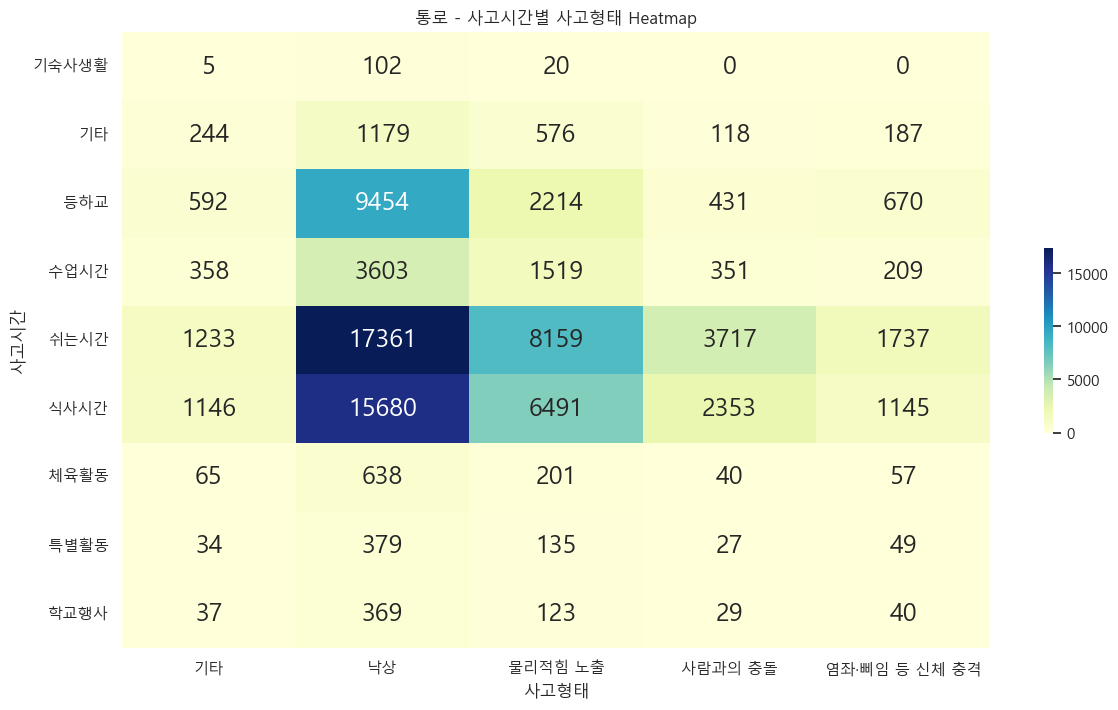

,사고형태,사고시간,사고발생건수
21,쉬는시간,낙상,17361
26,식사시간,낙상,15680
11,등하교,낙상,9454
22,쉬는시간,물리적힘 노출,8159
27,식사시간,물리적힘 노출,6491


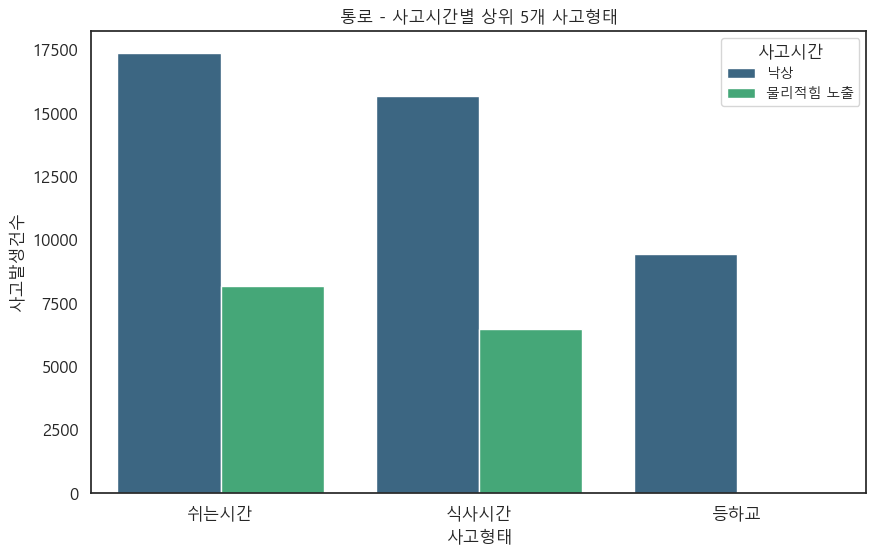

In [76]:
# 통로에서 발생하는 사고에 대한 분석
df = sorted_place_time.reset_index()
plot_heatmap_type_time(df, "통로")
plot_top5_bar_chart(df, '통로')

----
**통로 - 사고시간별 사고형태 분석**

위 히트맵은 통로에서의 사고 시간별 사고 형태를 시각화한 것이다. 이를 통해 다음과 같은 정보를 얻을 수 있다.

- 통로에서 쉬는 시간과 식사 시간에 낙상사고와 물리적힘 노출 사고가 가장 많이 발생하였다.
- 등하교 시간에도 상당수의 낙상 사고가 발생하였다.

위와 같은 문제를 해결하기 위해, 다음과 같은 노력을 할 수 있다.

- 통로에서 일어나는 낙상 사고 및 물리적힘 노출 사고를 방지하기 위해, 통로에서 뛰어다니지 않도록 지도해야 한다.
- 등하교 시간 동안 학생들의 안전을 강화하기 위해 감독하는 인원을 배치할 필요가 있다.
- 청소시간(쉬는 시간에 포함)에는 특히, 물걸레질로 인해 바닥이 미끄러울 수 있으므로 학생들에게 주의를 주어야 한다.

----

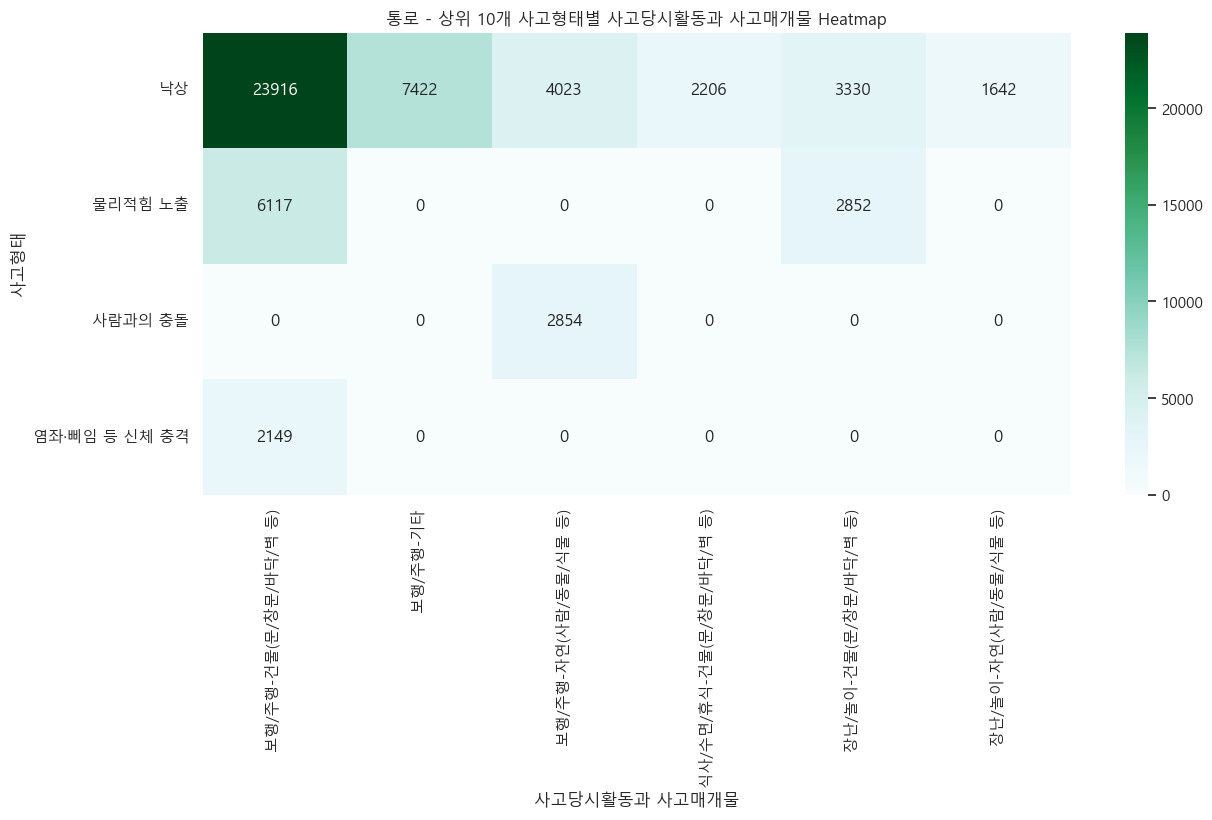

In [78]:
# 통로에서 발생하는 사고에 대한 분석
plot_heatmap_type_time_med(pivot_table, "통로")

----
**통로 - 사고형태별 사고활동과 사고매개물 분석**

위 히트맵은 통로에서의 사고 형태별 사고 활동과 사고 매개물을, 사고 발생 수가 많은 상위 10개의 사고 유형만을 시각화한 것이다. 이를 통해 다음과 같은 정보를 얻을 수 있다.

- 낙상 사고는 주로 보행/주행 중 발생하며, 문·창문·바닥·벽 등에 의해 가장 많이 발생한다.
- 물리적힘 노출에 의한 사고 역시 보행/주행 중 빈번히 발생하였다.
- 통로에서의 대부분의 사고는 보행/주행 중 발생하는 것을 알 수 있다.


위와 같은 문제를 해결하기 위해, 다음과 같은 노력을 할 수 있다.

- 통로에서는 낙상 사고가 빈번하게 일어나므로, 바닥 상태를 정기적으로 점검하고 미끄럼 방지 처리를 해야 한다.
- 통로에서 학생들이 뛰지 않도록 지도하고, 보행/주행 중 안전 수칙에 대해 주기적으로 교육해야 한다.
- 보행/주행 중 사고를 유발할 수 있는 물건이 통로에 방치되지 않도록 주기적으로 점검하고 정리해야 한다.

----

#### **결론**

위 분석을 통해 학교 내 다양한 장소에서 발생한 사고의 주요 형태와 원인을 파악할 수 있었다. 사고 분석 결과를 종합해 보면, 대부분의 사고는 낙상사고와 물리적힘 노출로 인한 사고가 주를 이루고 있음을 확인할 수 있었다. 이는 주로 체육활동, 식사 시간, 쉬는 시간 동안 빈번하게 발생하였다.

특히, 부속시설과 운동장에서 비슷한 형태로 사고가 발생하는 경향이 있으며, 이는 두 장소 모두에서 체육활동 중 발생하는 사고가 많기 때문인 것으로 보인다. 통로에서는 주로 낙상사고가 발생하며, 보행/주행 중 사고가 많이 일어나는 것으로 나타났다.

종합적인 제안 :

- 학생들의 물리적 접촉을 최소화할 수 있는 방안을 마련해야 한다.
- 낙상사고를 예방하기 위해 바닥 상태와 장비 상태를 주기적으로 점검하고 안전하게 유지해야 한다.
- 체육활동 중에는 안전장비 착용을 의무화하고, 철저한 안전 교육을 실시해야 한다.
- 식사 시간, 쉬는 시간 동안 학생들의 활동을 면밀히 감독해야 할 필요가 있다.
- 등하교 시간 동안 학생들이 안전하게 이동할 수 있도록 지도를 강화해야 한다.
- 통로에서 학생들이 안전하게 이동할 수 있도록 미끄럼 방지 처리를 하고, 통로에서 사고를 유발할 수 있는 물건이 방치되지 않도록 정기적으로 점검해야 한다.

위 분석 결과를 바탕으로 학교 내 안전 강화를 위한 방안을 마련하여, 학생들의 사고를 예방하고 보다 안전한 학교 환경을 조성하는 것을 기대한다.

----

## **학교급별 사고 발생 분석**

### **학교급별 사고 발생 수**

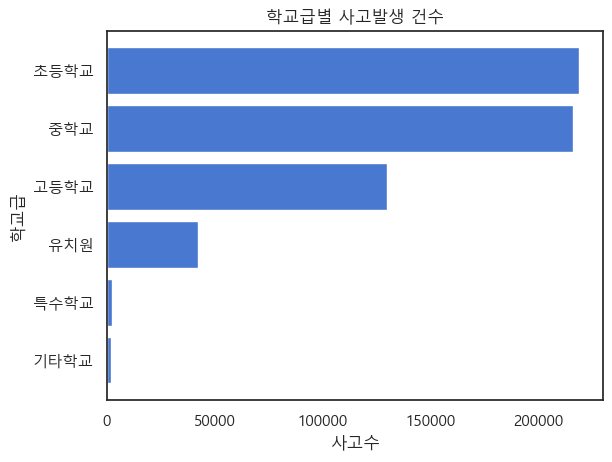

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# 각 학교급별로 데이터를 분리하였다
kindergarden = data_all[data_all["학교급"] == "유치원"]
elementary = data_all[data_all["학교급"] == "초등학교"]
middle = data_all[data_all["학교급"] == "중학교"]
high = data_all[data_all["학교급"] == "고등학교"]
special = data_all[data_all["학교급"] == "특수학교"]
etc = data_all[data_all["학교급"] == "기타학교"]

data = {
    "학교급": ["유치원", "초등학교", "중학교", "고등학교","특수학교","기타학교"],
    "사고수": [len(kindergarden), len(elementary), len(middle), len(high), len(special), len(etc)]
}

# 시각화 시, 사고 수가 많은 학교급이 위로 가도록 정렬하기 위한 코드
df = pd.DataFrame(data)
df = df.sort_values(by="사고수")

# 시각화 코드
plt.barh(df["학교급"], df["사고수"])
plt.xlabel("사고수")
plt.ylabel("학교급")
plt.title("학교급별 사고발생 건수")

plt.show()

----
위의 그래프를 보면, 초등학교에서 가장 많은 사고가 발생함을 알 수 있다. 그러나 이는 단순히 초등학생 인구가 많아서일 가능성이 크다. 단순하게 사고 발생 건수를 비교하면 인구 수의 영향을 배제할 수 없기 때문에 정확한 사고 위험성을 판단하기 어렵다. 이러한 이유로, 단순히 사고 발생 건수를 비교하는 것보다 인구 대비 사고 발생률을 비교하는 것이 더 적절하다고 판단하였다.

인구 대비 사고 발생률을 계산함으로써 각 학급별로 학생 한 명당 사고 발생 위험을 더 명확하게 평가할 수 있다. 사고 발생률은 사고 수를 인구수로 나눈 값으로, 인구 수의 영향을 배제한 상태에서 각 학교급의 사고 위험성을 평가할 수 있다.

아래에서 2019~2023년의 학교급별 인구 평균과 사고 발생 건수의 평균을 이용하여 새롭게 인구 대비 사고 발생률을 구하였다.

----

,학교급,인구수,사고수,사고발생률
0,유치원,595192.25,8480.6,0.014249
1,초등학교,2686642.25,43766.0,0.016290
5,기타학교,21713.25,390.8,0.017998
4,특수학교,26056.75,511.6,0.019634
3,고등학교,1317332.25,26010.0,0.019744
2,중학교,1323696.75,43233.0,0.032661


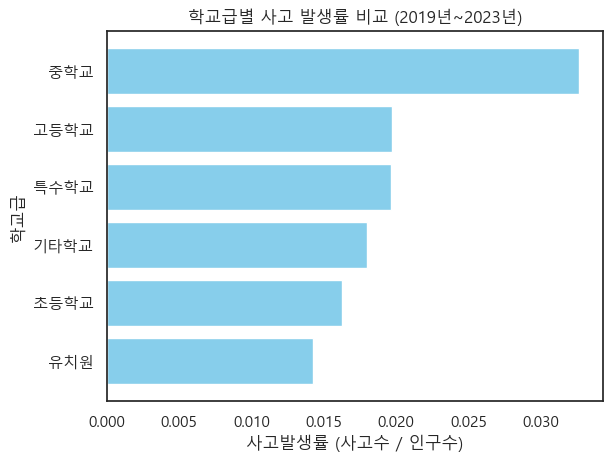

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 학교급별 학생 수 데이터를 불러온 후 2019년~2022년 학생 수의 평균을 계산한 후 저장하였다
grade_st = pd.read_csv("학교급별_학생수.csv", index_col=0, encoding='cp949')
years = [" 2019년", " 2020년", " 2021년", " 2022년"]
filtered_grade_st = grade_st[years]
grade_st['평균'] = filtered_grade_st.mean(axis=1)

# 각 학교급의 인구 수 (2019년~2022년 평균)
population_data = {
    "학교급": ["유치원", "초등학교", "중학교", "고등학교","특수학교","기타학교"],
    "인구수": grade_st['평균'].tolist()
}

# 각 학교급의 사고 발생 건수 (2019년~2023년 평균)
incident_data = {
    "학교급": ["기타학교", "특수학교", "유치원", "초등학교", "중학교", "고등학교"],
    "사고수": [len(etc)/5, len(special)/5, len(kindergarden)/5, len(elementary)/5, len(middle)/5, len(high)/5]
}

# 데이터프레임 생성
df_population = pd.DataFrame(population_data)
df_incidents = pd.DataFrame(incident_data)

# 인구 수와 사고수 데이터 병합
df = pd.merge(df_population, df_incidents, on="학교급")

# 사고 발생률 계산 (사고수 / 인구수)
df["사고발생률"] = df["사고수"] / df["인구수"]

# 사고 발생률 기준으로 정렬
df = df.sort_values(by="사고발생률")

display(df)

# 시각화
plt.barh(df["학교급"], df["사고발생률"], color='skyblue')
plt.xlabel("사고발생률 (사고수 / 인구수)")
plt.ylabel("학교급")
plt.title("학교급별 사고 발생률 비교 (2019년~2023년)")
plt.show()

----
위 그래프는 각 학교급별로 인구 대비 사고 발생률을 분석한 결과이다.

- 중학교 : 사고 발생률이 가장 높게 나타난다. 이는 중학생들이 사고에 더 취약하거나 더 많은 위험한 활동에 노출되어 있을 가능성이 있음을 시사한다.
- 고등학교 : 두 번째로 높은 사고 발생률을 보인다. 고등학생들은 주로 학습과 관련된 다양한 활동과 환경에 놓여있으므로, 중학교보다 비교적으로 낮은 사고 발생률을 보인다고 추정할 수 있다.
- 특수학교 : 사고 발생률이 고등학교와 비슷하게 나타났다. 특수학교 학생들은 일반학교 학생들과 환경이 다르기 때문에 특별한 주의와 관리가 필요하다.
- 기타학교 : 사고 발생률이 중간 수준이다. 기타학교에는 다양한 형태의 교육 기관이 포함되어 있기 때문에, 각 기관에 맞는 특정한 관리와 예방 조치가 필요하다.
- 초등학교 : 사고 발생률이 비교적 낮게 나타난다. 인구 수가 가장 많음에도 불구하고 사고 발생률이 높지 않다는 것은 상대적으로 안전한 환경이 조성되어 있다는 것을 의미한다.
- 유치원 : 사고 발생률이 가장 낮다. 이는 유치원에 다니는 아이들이 상대적으로 더 안전한 환경에서 교육을 받고 있음을 시사한다.


----

#### **결론**

위 분석에서, 학교급별로 인구 대비 사고 발생률을 계산함으로써, 단순 사고 발생 건수 분석의 한계를 극복할 수 있었다. 특히, 중학교와 특수학교에서의 사고 발생률이 높아 해당 학교급에서의 안전 관리와 예방 조치가 더욱 중요하다는 결론을 얻었다.

사고 발생률이 상대적으로 높은 학교들에 다음과 같은 조치가 필요하다.

1. 중학교 :

   - 다른 학교급보다 사고에 취약하고, 학생들이 더 활발히 활동하기 때문에 사고 발생률이 높은 것으로 나타난다. 따라서, 더 많은 안전 교육 프로그램을 도입하고, 학생들이 안전하게 활동할 수 있도록 환경을 조성해야 한다.
   - 학교 내의 위험 요소를 사전에 파악하고 제거하는 등의 예방 조치를 강화해야 한다.

<t>

2. 고등학교 :

   - 다양한 활동과 학습 환경에서 발생할 수 있는 사고를 예방하기 위한 구체적인 계획을 수립해야 한다.
   - 학생들이 자발적으로 안전 수칙을 준수하도록 동기부여할 수 있는 프로그램을 마련해야 한다.

<t>
     
3. 특수학교 :
   
   - 특수학교의 학생들이 필요로 하는 각 학교만의 특별한 안전 정책을 마련하고, 맞춤형 안전 교육을 실시해야 한다.
   - 교사와 직원들이 학생들의 특수한 요구를 충분히 이해하고 대응할 수 있도록 교육을 강화해야 한다.
  
  
<t>

4. 기타학교 :

   - 다양한 교육 기관에서의 안전 관리 방안은 구체적으로 마련하고, 해당 교육기관에 맞는 맞춤형 안전 프로그램을 도입해야 한다.

이러한 결과를 바탕으로 각 학교급별로 적절한 예방 조치를 마련함으로써 학생들의 안전을 강화하고, 사고를 줄일 수 있을 것으로 기대된다.

----

### **학교급에 따른 사고시간별 사고 비율**

,학교급,사고시간,사고 수
0,고등학교,기숙사생활,1718
1,고등학교,기타,4020
2,고등학교,등하교,5201
3,고등학교,수업시간,11496
4,고등학교,쉬는시간,12632
...,...,...,...
48,특수학교,쉬는시간,304
49,특수학교,식사시간,369
50,특수학교,체육활동,366
51,특수학교,특별활동,119


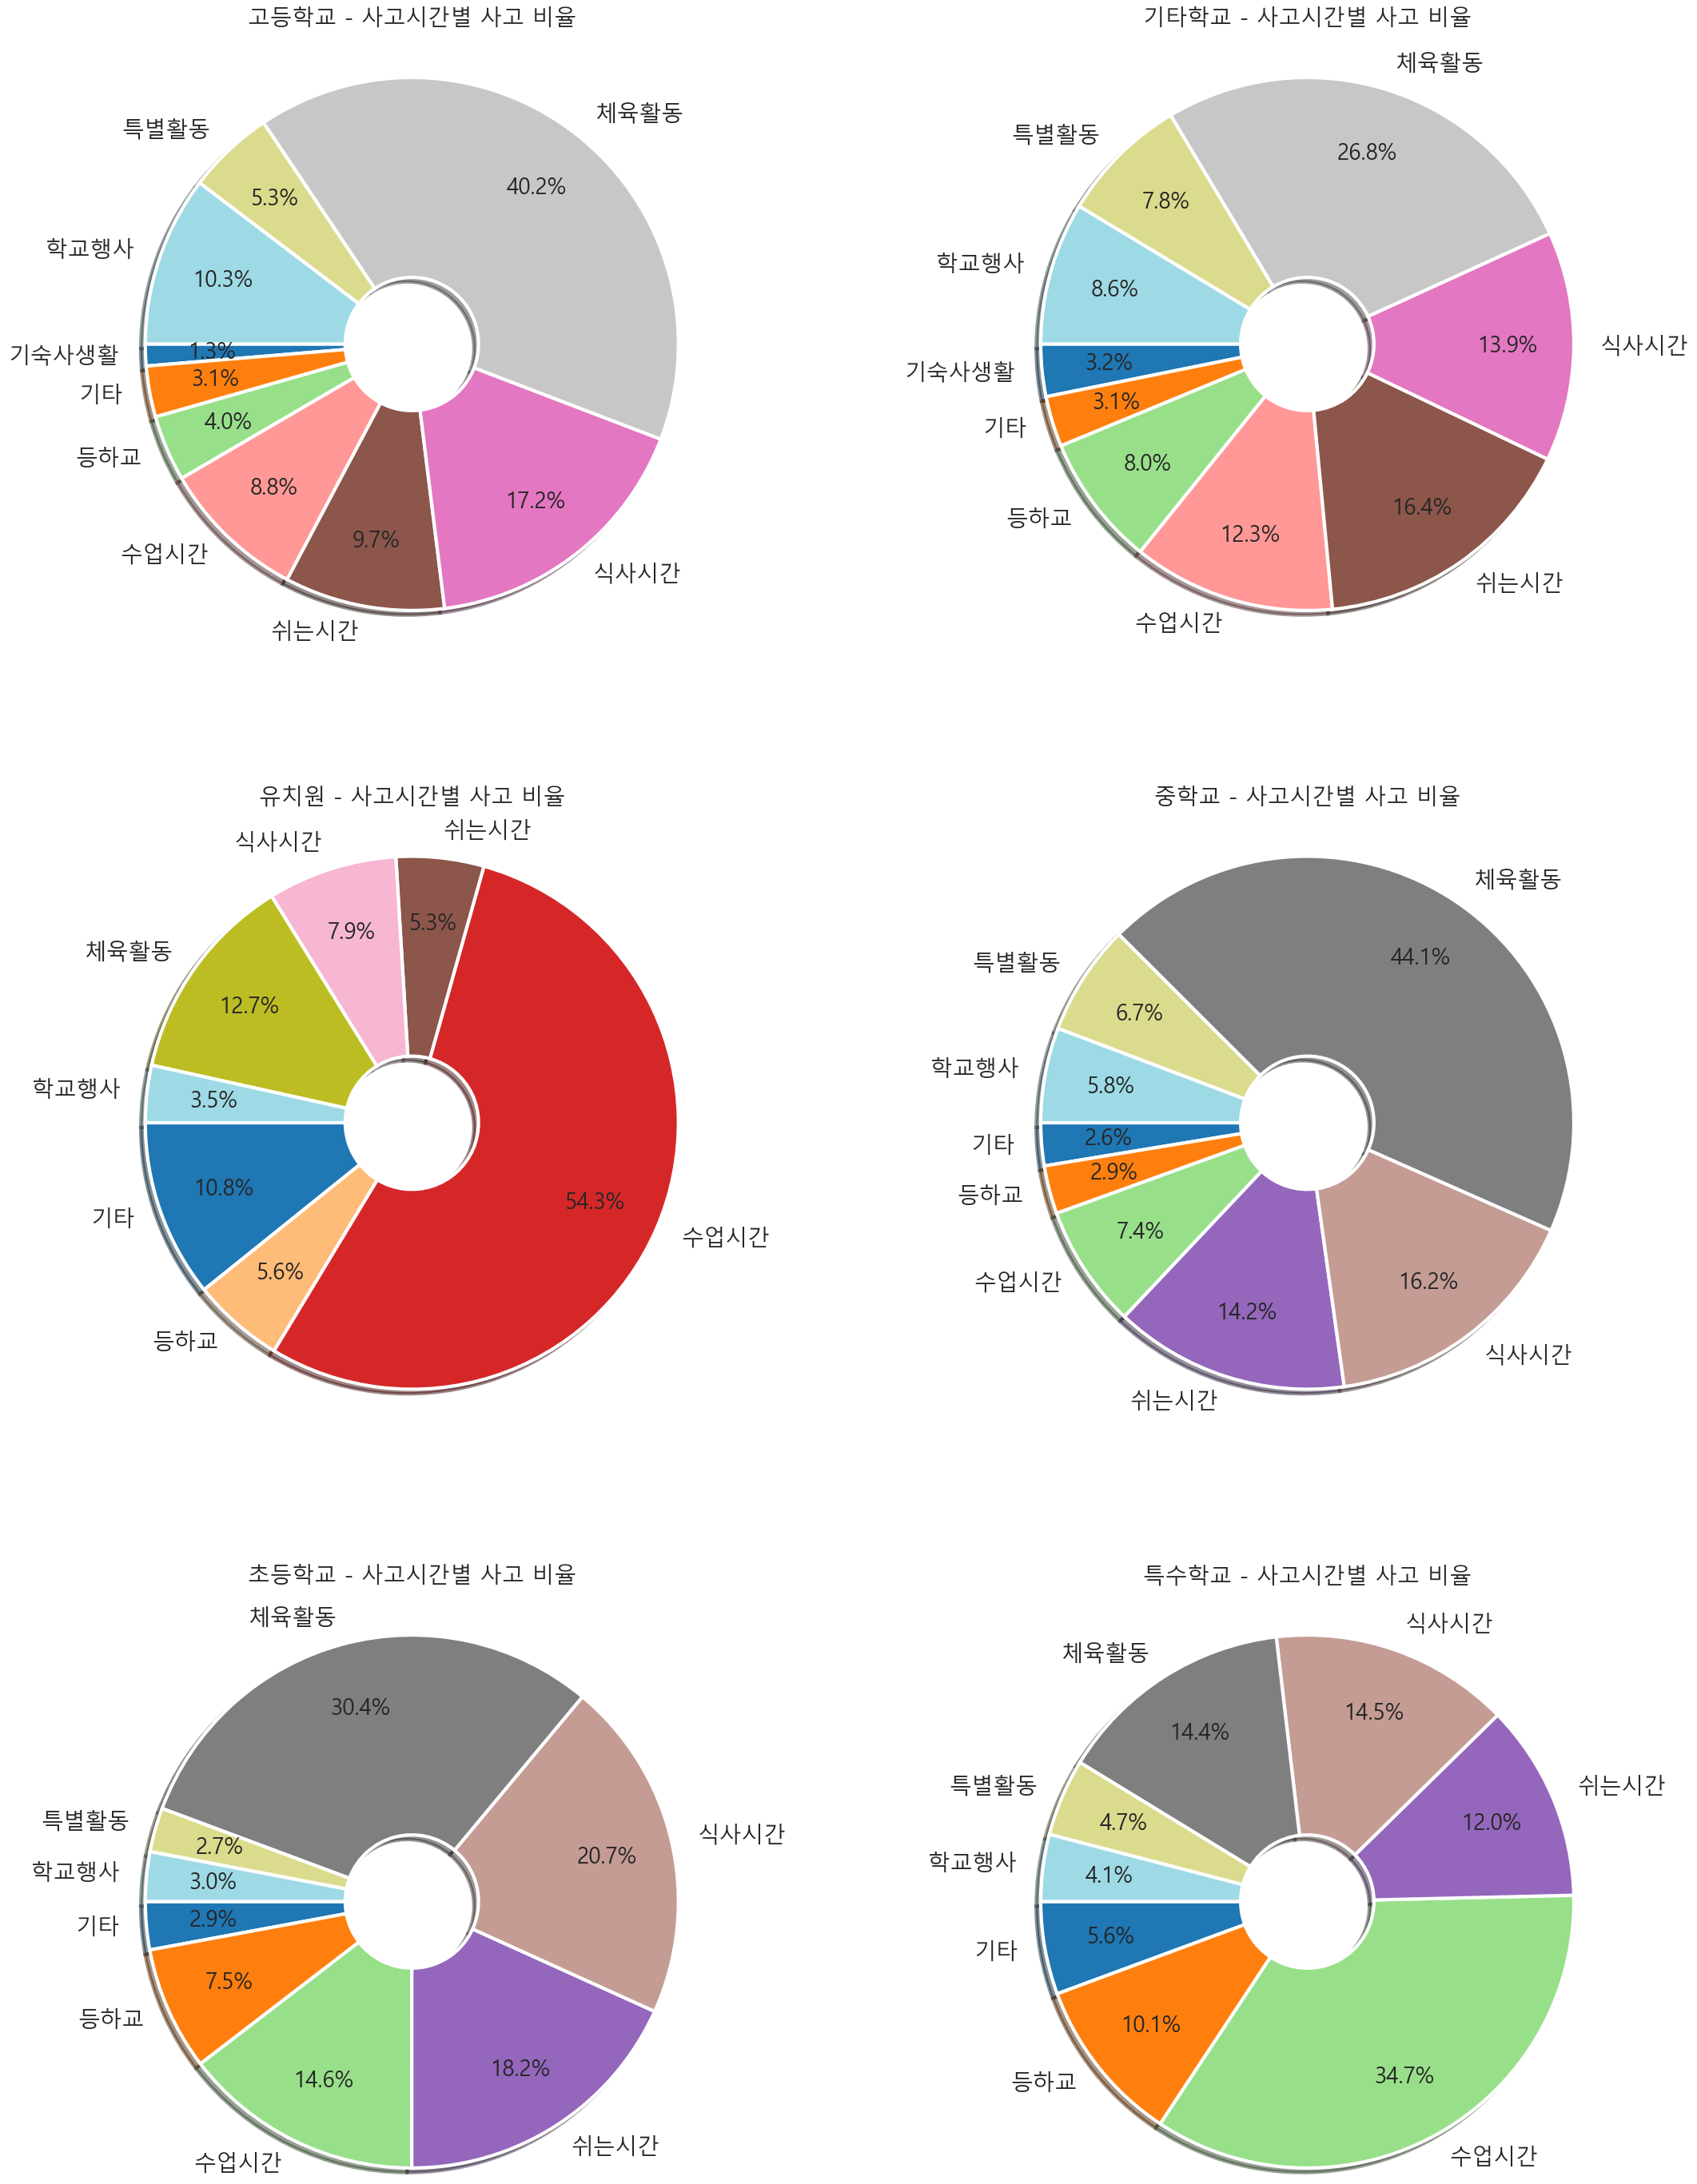

In [92]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

grade_place = data_all.groupby(['학교급','사고시간']).size().reset_index(name="사고 수")
school_grades = grade_place["학교급"].unique()

display(grade_place)

# 학교급별 사고시간에 따른 사고 수 원그래프로 시각화
wedgeprops={'width': 1.2, 'edgecolor': 'w', 'linewidth': 3}

plt.figure(figsize=(24,30))
for i, grade in enumerate(school_grades, 1):
    grade_data = grade_place[grade_place["학교급"] == grade]

    total_grade = grade_data["사고 수"].sum()
    filtered_data = grade_data[grade_data["사고 수"] / total_grade >= 0.01]

    colors = matplotlib.colormaps.get_cmap('tab20')(np.linspace(0, 1, len(filtered_data)))

    plt.subplot(3, 2, i)
    plt.pie(filtered_data["사고 수"], labels=filtered_data["사고시간"], autopct='%1.1f%%',
            wedgeprops = wedgeprops, startangle=180, shadow=True, pctdistance=0.75,
            textprops={'fontsize': 20}, radius=1.6, colors=colors)
    plt.title(f"{grade} - 사고시간별 사고 비율", y=1.25, fontsize=20)
    

plt.subplots_adjust(hspace=0.25)
plt.tight_layout(pad=7)
plt.show()

----
분석 결과 :

1. 고등학교
- 주요 사고 시간대: 체육활동 (40.1%), 식사시간 (17.2%), 학교행사 (10.3%)
- 특징: 고등학생들은 체육활동과 식사시간 동안 사고 발생 비율이 높다. 체육활동에서의 사고 비율이 높게 나타나는 이유는, 고등학생들이 참여하는 체육활동이 다른 학교급보다 더 고강도이거나 더 다양한 스포츠를 포함하기 때문일 수 있다. 또한, 체육활동 중 발생하는 신체 접촉과 운동 강도가 높을 수 있기 때문에 사고 발생 위험이 증가할 수 있다. 학교행사 중에도 사고가 많이 발생하는데, 이는 행사에서의 안전 관리가 필요함을 시사한다.

2. 기타학교
- 주요 사고 시간대: 체육활동 (26.8%), 쉬는시간 (16.3%), 식사시간 (13.9%), 수업시간(12.3%)
- 특징: 기타학교에서도 체육활동 중 사고 발생 비율이 높다. 학생들이 자유롭게 활동할 수 있는 쉬는시간과 식사시간에도 사고가 빈번히 발생하므로, 이 시간대에 대한 안전 관리가 중요하다.
  
3. 유치원
- 주요 사고 시간대: 수업시간 (54.4%), 체육활동 (12.6%), 기타 (10.7%)
- 특징: 유치원에서는 수업 시간 동안 사고 발생 비율이 압도적으로 높다. 이는 어린이들이 수업 중 움직임이 많거나 주의가 산만해지기 쉬운 점을 반영한 것이라 볼 수 있다. 체육활동과 식사시간, 기타시간에도 사고가 발생하므로, 어린이들의 활동을 세심하게 감독할 필요가 있다.
  
4. 중학교
- 주요 사고 시간대: 체육활동 (44.1%), 식사시간 (16.2%), 쉬는시간 (14.3%)
- 특징: 중학생들도 체육활동 중 사고 발생 비율이 높다. 식사시간과 쉬는시간 등 비수업 시간 동안에 사고가 많이 발생하는 것으로 나타난다. 이는 기타학교와 유사한 경향을 보인다. 체육활동 중 안전 장비 착용과 식사시간 동안의 안전 관리가 필요하다.
  
5. 초등학교
- 주요 사고 시간대: 체육활동 (30.3%), 식사시간 (20.7%), 쉬는시간 (18.2%), 수업시간(14.6%)
- 특징: 초등학생들은 체육활동과 식사시간 동안 사고가 특히 많이 발생한다. 수업시간에도 사고가 빈번히 발생하므로, 이 시간에 대한 안전 교육과 관리가 필요합니다.
  
6. 특수학교
- 주요 사고 시간대: 수업시간 (34.7%), 식사시간(14.6%), 체육활동 (14.4%), 쉬는시간(12.0%)
- 특징: 특수학교에서는 수업시간 동안 사고 발생 비율이 높다. 이는 특수학교 학생들이 수업 중 더욱 집중적인 관리를 필요로 한다는 것을 반영합니다. 모든 시간대에서 적지 않게 사고가 발생하므로, 각 시간대별로 적절한 안전 조치가 필요하다.


인사이트 :

1. 대부분의 학교급에서 체육활동 중 사고 발생 비율이 높게 나타난다. 이는 체육활동 시 안전 장비 착용 및 안전 교육 강화가 필요함을 시사한다.

2. 초등학교, 중학교, 고등학교에서는 식사시간 중 사고 발생 비율이 15% 이상으로 상대적으로 높게 나타났다. 학생들이 식사 중 과도한 장난을 치지 않도록 주의를 주어야 하며, 식사 중뿐만 아니라 식사 전후의 쉬는 시간에도 안전에 유의할 수 있도록 지도해야 한다.

3. 유치원에서는 수업시간 동안 사고 발생 비율이 압도적으로 높다. 이는 유치원생들의 활동량이 많고 주의력이 낮아 발생할 수 있는 사고를 예방하기 위한 안전 대책 수립이 필요함을 의미한다.

4. 특수학교의 경우 수업시간, 식사시간, 체육활동에서 사고가 가장 빈번하게 일어나지만, 다른 시간대에도 적지 않게 사고가 발생한다. 이는 특수학교에서의 전반적인 안전 관리 강화가 필요하다는 것을 의미한다.

이와 같은 분석을 통해 각 학교급별로 특화된 안전 대책을 마련하여, 학생들의 안전을 효과적으로 보장할 수 있을 것이다.

----

## **계절별 사고 발생 패턴 분석**

In [95]:
# 사고발생일로부터 계절을 정보를 반환하는 함수
def get_season(m):
    if m in [12,1,2]:
        return "겨울"
    elif m in [3,4,5]:
        return "봄"
    elif m in [6,7,8]:
        return "여름"
    else:
        return "가을"


#계절 데이터 생성
season_acc = pd.DataFrame()
season_acc['사고발생일'] = pd.to_datetime(data_all['사고발생일'])
season_acc['월'] = data_all['사고발생일'].dt.month
season_acc['계절'] = season_acc['월'].apply(get_season)
season_acc['사고형태'] = data_all['사고형태']
season_acc['사고시간'] = data_all['사고시간']

season_acc_time = season_acc.groupby(['계절', '사고시간']).size().reset_index(name='사고 수')
season_acc_type = season_acc.groupby(['계절', '사고형태']).size().reset_index(name='사고 수')


# 계절별 총 사고 건수 계산
total_accidents_by_season = season_acc.groupby('계절').size().reset_index(name='총 사고 수')

# 총 사고 수를 기준으로 사고부위별 비율 계산을 위해 데이터 병합
season_acc_time = season_acc_time.merge(total_accidents_by_season, on='계절')
season_acc_type = season_acc_type.merge(total_accidents_by_season, on='계절')


# 사고 부위별 비율 계산
season_acc_time['사고 비율'] = season_acc_time['사고 수'] / season_acc_time['총 사고 수']
season_acc_type['사고 비율'] = season_acc_type['사고 수'] / season_acc_type['총 사고 수']

----
get_season 함수는 월(m)을 입력받아 해당 월을 포함하는 계절을 반환하는 함수이다.<br>
계절과 사고형태 및 사고시간의 상관성을 파악하기 위해, 사고발생일 데이터를 바탕으로 해당 일에 대한 계절 데이터를 생성하였다.

----

,계절,사고 건수
0,가을,211781
1,겨울,63862
2,봄,195335
3,여름,140982


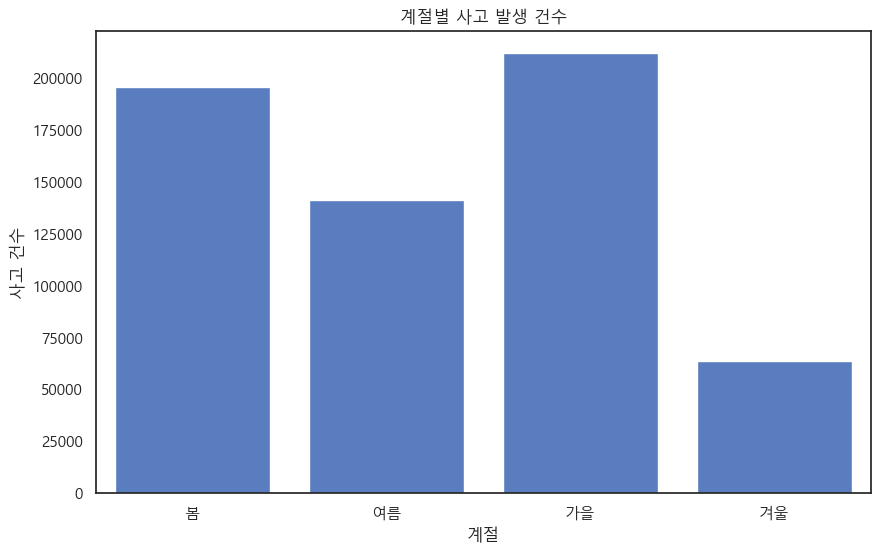

In [97]:
import seaborn as sns

# 계절별 사고 건수 집계
seasonal_accidents = season_acc.groupby('계절').size().reset_index(name='사고 건수')

display(seasonal_accidents)

# 시각화 코드
plt.figure(figsize=(10, 6))
sns.barplot(x='계절', y='사고 건수', data=seasonal_accidents, order=['봄','여름','가을','겨울'])
plt.title('계절별 사고 발생 건수')
plt.xlabel('계절')
plt.ylabel('사고 건수')
plt.show()

----
가을, 봄, 여름, 겨울 순으로 사고가 많이 발생했음을 알 수 있다.

----

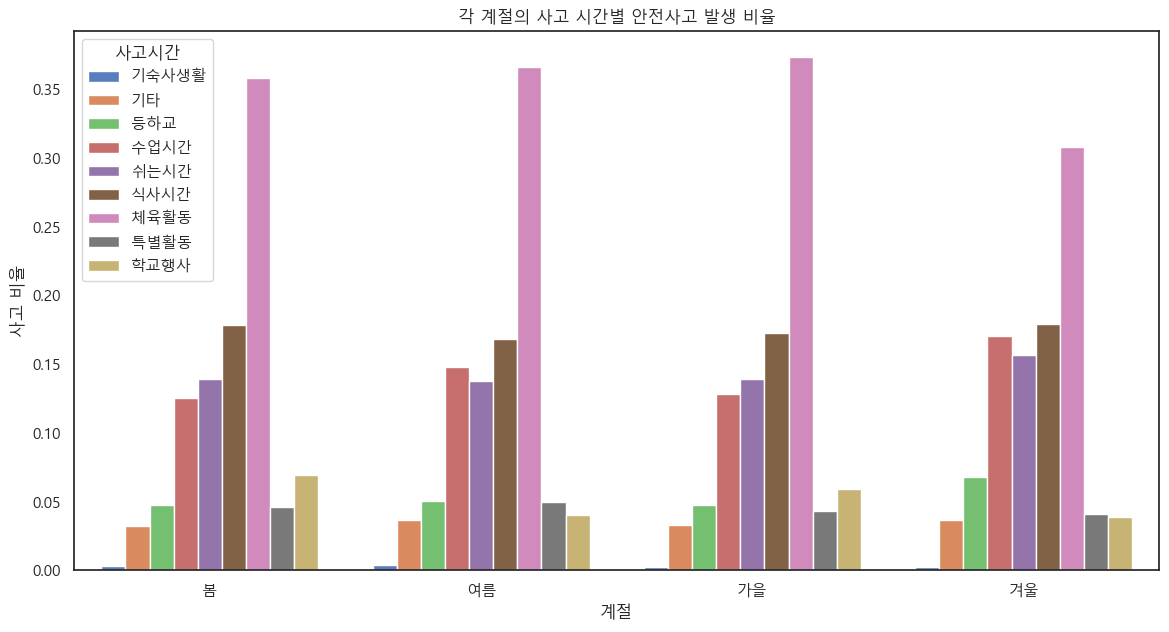

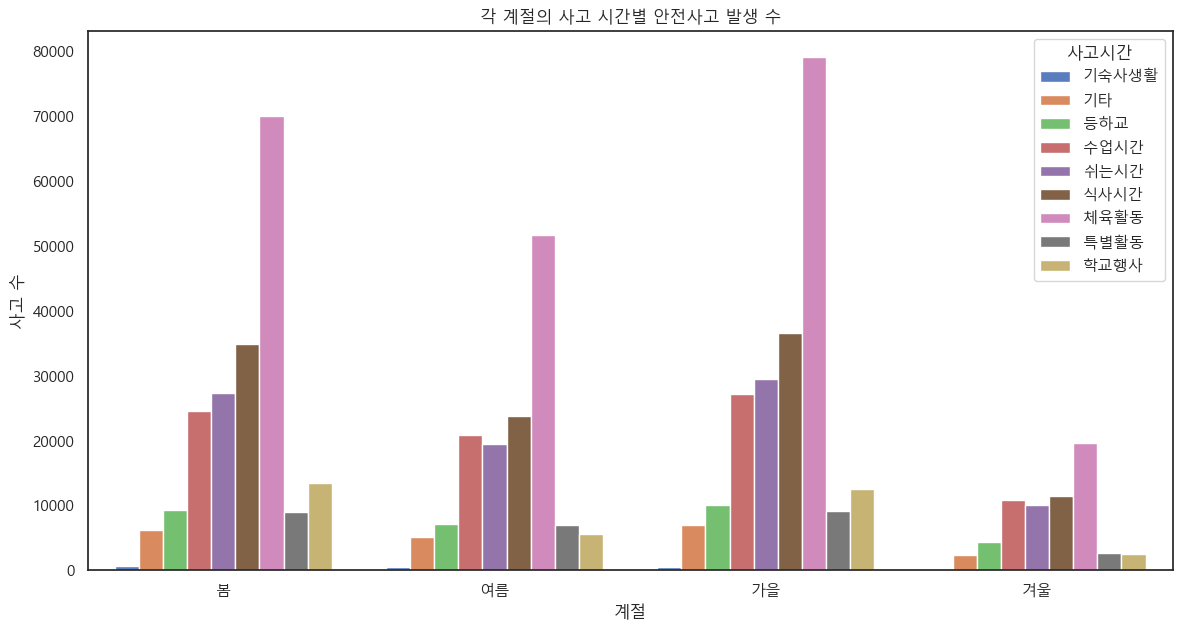

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white', palette='muted', font='Malgun Gothic')

# 계절별로 각 사고 시간에 발생한 사고 수를 비율로 시각화
plt.figure(figsize=(14, 7))
sns.barplot(x='계절', y='사고 비율', hue='사고시간', data=season_acc_time, order=['봄','여름','가을','겨울'])
plt.title('각 계절의 사고 시간별 안전사고 발생 비율')
plt.xlabel('계절')
plt.ylabel('사고 비율')
plt.legend(title='사고시간')
plt.show()

# 계절별로 각 사고 시간에 발생한 사고 수 시각화
plt.figure(figsize=(14, 7))
sns.barplot(x='계절', y='사고 수', hue='사고시간', data=season_acc_time, order=['봄','여름','가을','겨울'])
plt.title('각 계절의 사고 시간별 안전사고 발생 수')
plt.xlabel('계절')
plt.ylabel('사고 수')
plt.legend(title='사고시간')
plt.show()

----
- 봄 : 봄은 날씨가 풀리면서 실외 활동이 증가하는 시기로, 기온 변화에 따른 활동 증가로 인해 다양한 사고가 발생하는 시기이다. 특히 체육활동 중 사고가 가장 많이 발생하므로 주의가 필요하다. 또한, 학기가 시작하면서 다양한 학교 행사들이 개최되어, 학교 행사에서 발생하는 사고도 다른 계절에 비해 많다는 특징이 있다.
  
- 여름 : 여름에는 방학으로 인해 학교에 가는 인원이 적어 봄이나 가을보다 상대적으로 사고 발생 수가 적게 나타난다. 여름의 사고 비율을 보면 수업시간에 발생하는 사고 수가 상대적으로 높게 나타나는데, 이는 방학 중 방과 후 교실 활동 및 기타 활동 때문으로 보인다. 고온으로 인해 실내 활동이 많아질 수 있으며, 이로 인한 사고 발생 가능성도 고려해야 한다.

- 가을 : 가을에는 학기 초 학교에서의 활발한 활동이 많아지면서, 물리적힘 노출에 의한 사고가 증가한다. 봄과 같이 체육활동과 학교 행사가 늘어나면서 이에 따른 사고도 증가하는 경향이 있다.
  
- 겨울 : 겨울철은 특히 바닥의 미끄러움으로 인해 낙상사고가 많이 발생할 수 있는 계절이다. 사고 비율을 나타내는 그래프를 보면, 등하교 중 발생하는 사고의 비율이 다른 계절에 비해 높다는 것을 알 수 있다. 여름과 마찬가지로 방학으로 인해 전체적으로 발생하는 사고 수는 적지만, 수업시간이 차지하는 비율은 가장 높게 나타난다.

----

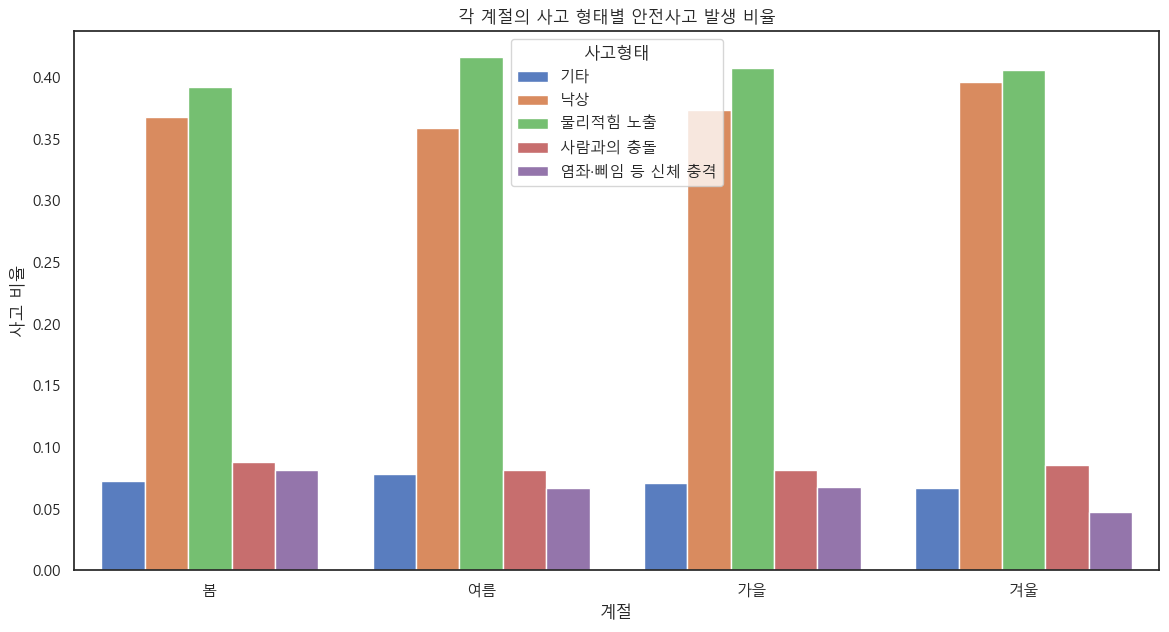

In [101]:
import seaborn as sb
import matplotlib.pyplot as plt

# 각 계절 사고 형태별 안전사고 발생 수 시각화
plt.figure(figsize=(14, 7))
sb.barplot(x='계절', y='사고 비율', hue='사고형태', data=season_acc_type, order=['봄','여름','가을','겨울'])
plt.title('각 계절의 사고 형태별 안전사고 발생 비율')
plt.xlabel('계절')
plt.ylabel('사고 비율')
plt.legend(title='사고형태')
plt.show()

----
위 그래프를 보면, 모든 계절에서 물리적힘 노출에 의한 사고가 가장 많이 발생하며, 그 뒤를 이어 낙상 사고가 많이 발생한다는 것을 알 수 있다. 기타 사고, 사람과의 충돌, 염좌·삐임 등 신체 충격은 상대적으로 적게 발생하는 것으로 나타난다. 이는 앞서 진행한 사고 장소와 사고 형태에 대한 분석에서 얻은 결과와 일치한다. 

봄, 여름, 가을, 겨울 모두 비슷한 사고 형태 패턴을 보이지만, 한 가지 중요하게 보아야 할 점은 겨울의 낙상사고이다. 겨울에는 다른 계절보다 낙상 사고의 비율이 더 높다는 것을 확인할 수 있다. 이는 겨울에 얼음이나 눈으로 인해 미끄러짐 등의 낙상사고가 더 많이 발생할 수 있음을 시사한다.

----

#### **계절별 사고 발생 패턴 - 연관 분석**

In [104]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# 계절별로 데이터를 나누어 분석
data_all['계절'] = data_all['사고발생일'].dt.month % 12 // 3 + 1

for season in [1, 2, 3, 4]:  # 1:겨울, 2:봄, 3:여름, 4:가을
    season_data = data_all[data_all['계절'] == season]
    
    # 사고형태, 사고당시활동, 사고부위 각각에 대한 One-hot encoding
    one_hot = pd.get_dummies(season_data[['사고형태', '사고당시활동', '사고부위']])
    
    # 연관분석
    frequent_itemsets = apriori(one_hot, min_support=0.05, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    sorted_by_support = rules.sort_values(by='support', ascending=False)

    kseason = ['겨울','봄','여름','가을']
    
    print(f"{kseason[season-1]} - Sorted by support:")

    # 각 계절별 상위 10개의 연관 규칙만 출력
    display(sorted_by_support[['antecedents','consequents','support','confidence','lift']].head(10))

겨울 - Sorted by support:


,antecedents,consequents,support,confidence,lift
6,(사고형태_물리적힘 노출),(사고당시활동_구기운동),0.170399,0.420609,1.148345
7,(사고당시활동_구기운동),(사고형태_물리적힘 노출),0.170399,0.465222,1.148345
14,(사고형태_물리적힘 노출),(사고부위_손),0.152188,0.375657,1.634099
15,(사고부위_손),(사고형태_물리적힘 노출),0.152188,0.662012,1.634099
4,(사고부위_발),(사고형태_낙상),0.147834,0.591690,1.495192
5,(사고형태_낙상),(사고부위_발),0.147834,0.373575,1.495192
0,(사고형태_낙상),(사고당시활동_보행/주행),0.121841,0.307890,1.675970
1,(사고당시활동_보행/주행),(사고형태_낙상),0.121841,0.663229,1.675970
19,(사고부위_손),(사고당시활동_구기운동),0.121027,0.526463,1.437346
18,(사고당시활동_구기운동),(사고부위_손),0.121027,0.330426,1.437346


봄 - Sorted by support:


,antecedents,consequents,support,confidence,lift
8,(사고형태_물리적힘 노출),(사고당시활동_구기운동),0.197486,0.504196,1.209692
9,(사고당시활동_구기운동),(사고형태_물리적힘 노출),0.197486,0.473819,1.209692
12,(사고형태_물리적힘 노출),(사고부위_손),0.182318,0.465469,1.710770
13,(사고부위_손),(사고형태_물리적힘 노출),0.182318,0.670085,1.710770
16,(사고당시활동_구기운동),(사고부위_손),0.167092,0.400897,1.473444
17,(사고부위_손),(사고당시활동_구기운동),0.167092,0.614127,1.473444
6,(사고부위_발),(사고형태_낙상),0.138895,0.550168,1.498343
7,(사고형태_낙상),(사고부위_발),0.138895,0.378269,1.498343
29,(사고부위_손),"(사고형태_물리적힘 노출, 사고당시활동_구기운동)",0.124386,0.457166,2.314924
28,(사고당시활동_구기운동),"(사고형태_물리적힘 노출, 사고부위_손)",0.124386,0.298434,1.636891


여름 - Sorted by support:


,antecedents,consequents,support,confidence,lift
6,(사고형태_물리적힘 노출),(사고당시활동_구기운동),0.208686,0.501551,1.174287
7,(사고당시활동_구기운동),(사고형태_물리적힘 노출),0.208686,0.488599,1.174287
12,(사고형태_물리적힘 노출),(사고부위_손),0.183867,0.441902,1.647633
13,(사고부위_손),(사고형태_물리적힘 노출),0.183867,0.685550,1.647633
16,(사고당시활동_구기운동),(사고부위_손),0.163602,0.383044,1.428179
17,(사고부위_손),(사고당시활동_구기운동),0.163602,0.609992,1.428179
4,(사고부위_발),(사고형태_낙상),0.137273,0.546973,1.525064
5,(사고형태_낙상),(사고부위_발),0.137273,0.382743,1.525064
29,(사고부위_손),"(사고형태_물리적힘 노출, 사고당시활동_구기운동)",0.124569,0.464456,2.225618
28,(사고당시활동_구기운동),"(사고형태_물리적힘 노출, 사고부위_손)",0.124569,0.291655,1.586224


가을 - Sorted by support:


,antecedents,consequents,support,confidence,lift
6,(사고형태_물리적힘 노출),(사고당시활동_구기운동),0.203323,0.499119,1.184597
7,(사고당시활동_구기운동),(사고형태_물리적힘 노출),0.203323,0.482562,1.184597
12,(사고형태_물리적힘 노출),(사고부위_손),0.178642,0.438532,1.643008
13,(사고부위_손),(사고형태_물리적힘 노출),0.178642,0.669303,1.643008
16,(사고당시활동_구기운동),(사고부위_손),0.156430,0.371268,1.390998
17,(사고부위_손),(사고당시활동_구기운동),0.156430,0.586084,1.390998
4,(사고부위_발),(사고형태_낙상),0.147204,0.565236,1.515747
5,(사고형태_낙상),(사고부위_발),0.147204,0.394745,1.515747
29,(사고부위_손),"(사고형태_물리적힘 노출, 사고당시활동_구기운동)",0.117801,0.441354,2.170703
28,(사고당시활동_구기운동),"(사고형태_물리적힘 노출, 사고부위_손)",0.117801,0.279586,1.565061


----
계절별 연관 규칙 분석 결과 :

사고 발생 시 어떤 패턴이 가장 많이 발생하는지, 즉 해당 패턴의 발생 빈도를 확인하기 위해 지지도(support) 값을 기준으로 정렬하였다.

- 겨울, 봄, 여름, 가을 모두에서 손(사고 부위)과 구기운동(사고 당시 활동), 물리적힘 노출(사고 형태) 사고의 연관성이 높게 나타났다. 이는 구기운동 중 손을 보호할 필요성이 있다는 것을 보여준다.
- 또한, 모든 계절에서 낙상 사고가 발생할 경우 발에 부상을 입을 가능성이 높음을 나타내는 규칙이 나타났다. 이를 통해 발을 보호하기 위한 조치가 필요하다는 것을 강조할 수 있다.
- 봄, 여름, 가을에서는 보행/주행 중 낙상사고가 상위 10개의 사고 패턴에 포함되지 않지만, 겨울에는 포함된다. 이는 겨울철 보행/주행 중 안전에 더 주의를 기울여야 한다는 것을 의미한다.

----

#### **계절별 사고 발생 패턴 결론**

위 분석을 통해 계절별 사고 발생 패턴을 파악할 수 있었다. 계절별로 사고 발생 건수 및 비율, 사고 형태 및 부위에 대한 연관 규칙 분석을 종합하여 아래와 같은 결론과 인사이트를 도출하였다.

**결론 :**
1. 가을, 봄, 여름, 겨울 순으로 사고 발생 건수가 많다.

   - 봄과 가을에는 학기가 시작함에 따라 활동이 활발해지고, 학교 행사가 많아지면서 사고 발생이 증가한다.
   - 여름과 겨울에는 방학으로 인해 상대적으로 전체 사고 발생 건수가 적지만, 방과 후 교실 활동 등 수업시간에서의 사고 비율이 높아졌다.
   - 겨울에는 다른 계절보다 낙상 사고의 비율이 높게 나타났다. 또한, 등하굣길에서의 사고 발생 비율이 다른 계절보다 더 높게 나타나는 경향이 있다.

<t>
  
2. 모든 계절에서 물리적힘 노출과 낙상사고가 주요 사고 형태로 나타난다.
3. 계절별 연관 규칙 분석을 통해 도출된 주요 패턴 :

   - 손 부상과 구기운동, 물리적힘 노출의 연관성이 높게 나타난다. 이는 구기운동 중 손을 보호할 필요성이 있음을 의미한다.
   - 낙상사고와 발 부상의 연관성이 높게 나타난다.
   - 겨울철에는 보행/주행 중 낙상 사고가 다른 계절보다 더 높은 비율로 발생하는 것으로 보인다. 겨울철 보행에 대한 안전 교육을 실시하여 학생들이 이에 대해 경각심을 가질 수 있도록 해야 한다.

**인사이트 :**

1. 계절별 사고 예방 대책 :
   
   - 봄, 가을 : 체육활동과 학교 행사가 많은 봄과 가을에는 체육활동 시 안전 장비 착용을 의무화하고, 운동장 및 학교 시설의 안전 점검을 강화해야 한다.
   - 여름 : 여름철에는 고온으로 인해 실내 활동이 많아지므로, 실내에서 발생할 수 있는 사고에 대한 예방 조치를 강화해야 한다. 또한 방학 중 방과 후 교실 및 기타 활동 중 발생할 수 있는 사고를 예방하기 위한 안전 교육이 필요하다.
   - 겨울 : 겨울에는 낙상사고 예방을 위한 조치가 필요하다. 특히 보행/주행 중 발생하는 사고를 예방하기 위해 학생들이 안전하게 이동할 수 있도록 미끄럼 방지 매트를 사용하는 등 환경을 조성해야 한다.

<t>
  
2. 사고 부위와 형태에 따른 보호 장비의 필요 :
   
   - 손 부위 보호를 위해 구기운동 시 손목 보호대, 발목 보호대 등 보호 장비를 착용하도록 지도해야 한다.
   - 낙상사고 예방을 위해 발을 보호할 수 있는 신발을 착용하도록 권장하고, 학교 시설 내 미끄러짐 방지 조치를 강화해야 한다.

<t>

3. 사고 발생 패턴에 따른 맞춤형 교육 :

   - 계절별로 반복적으로 나타나는 사고 패턴을 반영하여 맞춤형 안전 교육 프로그램을 개발하고, 이를 통해 학생들이 각 계절에 맞는 안전 수칙을 숙지하도록 해야 한다.
  
이 분석을 통해 계절별로 발생하는 사고 형태와 그 특성을 파악할 수 있었으며, 이를 바탕으로 계절별로 적절한 예방 조치를 마련함으로써 학교 내 안전사고를 효과적으로 줄일 수 있을 것으로 기대된다.

----

## **지역과 사고 발생 수의 관계**

In [109]:
import pandas as pd

# 각 지역별 학생 수 데이터를 불러온 후 2019년~2022년 학생 수의 평균을 계산한 후 저장였다
region_st = pd.read_csv("지역별_학생수.csv", encoding='cp949')
years = [' 2019년', ' 2020년',' 2021년', ' 2022년']
filtered_region_st = region_st[years]
region_st['평균'] = filtered_region_st.mean(axis=1)

# 지역과 사고자 성별을 저장하기 위해 새로운 데이터프레임 생성
region_mf = pd.DataFrame()
region_mf['지역'] = data_all['지역']
region_mf['성별'] = data_all['사고자성별']

# 지역과 성별을 그룹화하여 사고 수를 계산
region_mf = region_mf.groupby(['지역','성별']).size().reset_index(name="사고 수")

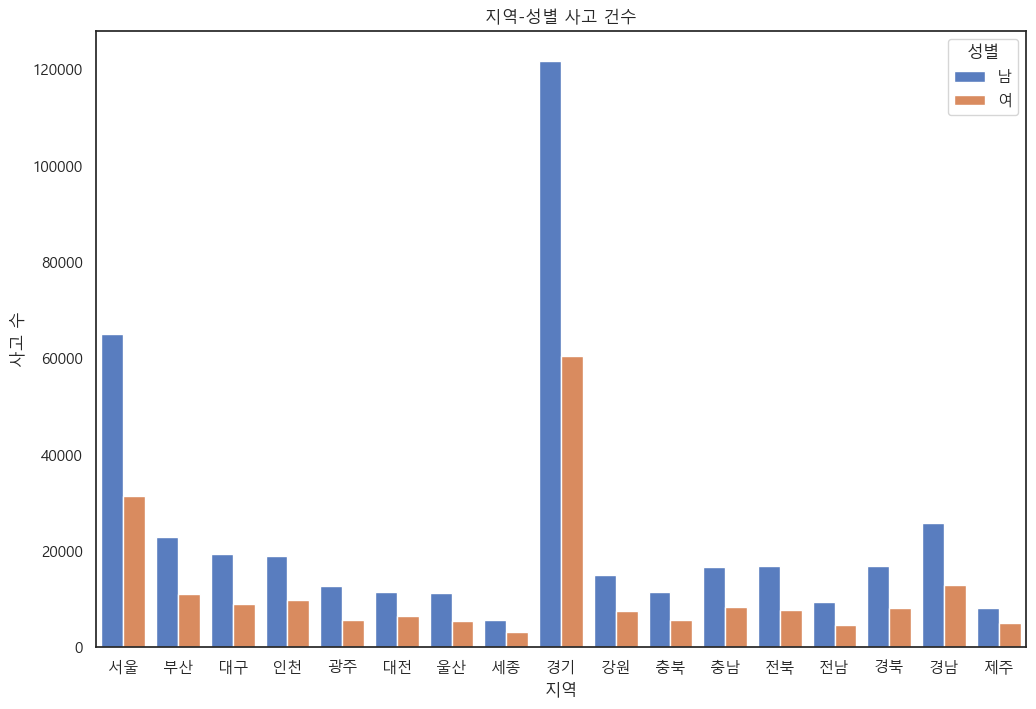

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별 - 지역별 사고 건수를 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='지역', y='사고 수', hue='성별', data=region_mf, order=region_st['지역구분'].tolist())
plt.title('지역-성별 사고 건수')
plt.show()

----
모든 지역에서 남성의 사고 건수가 여성보다 높게 나타나는 경향을 보인다.

각 지역별 사고 발생 수의 차이는 단순히 각 지역의 인구 수 차이에서 비롯된 것일 수 있다. 예를 들어, 경기도와 서울은 인구가 많은 대도시로, 이로 인해 사고 발생 건수도 높게 나타날 수 있다. 마찬가지로, 인구 수가 적은 세종과 제주에서는 사고 발생 건수도 상대적으로 적게 나타나는 경향을 보이고 있다.

위 그래프를 통해 남녀 간 사고 발생 건수의 차이는 확인할 수 있었지만, 각 지역마다 사고 발생 수가 다르게 나타나는 이유에 대해서는 확인하지 못하였다. 따라서, 이러한 차이의 원인을 보다 명확히 파악하기 위해 추가적인 분석을 진행하였다.

----

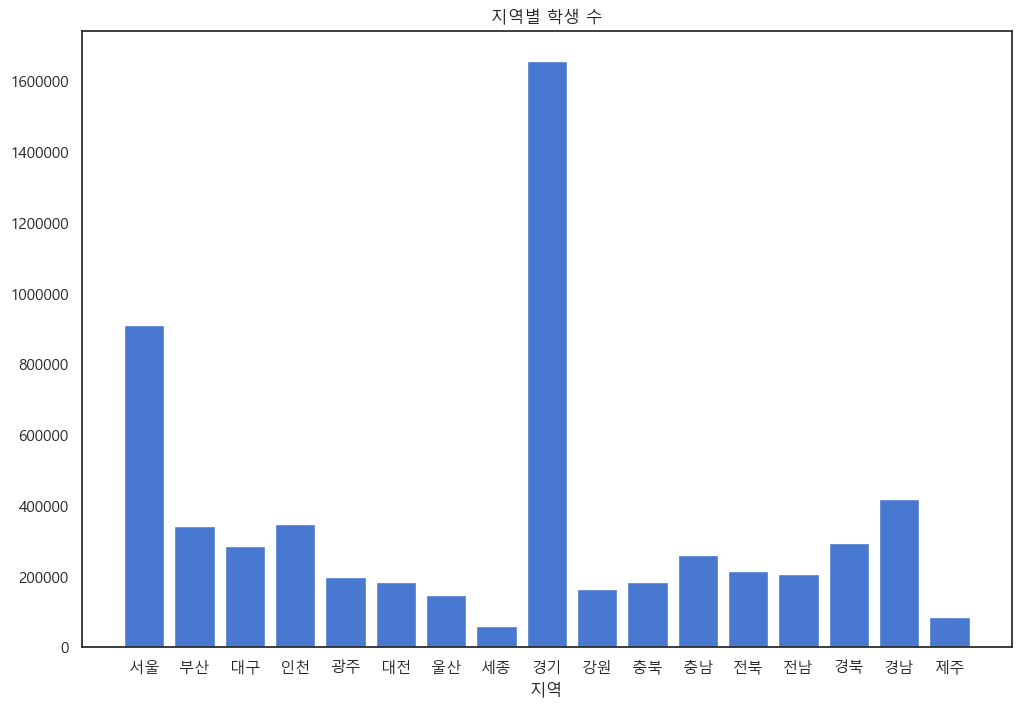

In [112]:
# 각 지역의 이름 리스트
region = region_st['지역구분'].tolist()

# 각 지역 2019년~2022년 학생 수의 평균 리스트
total_student = region_st['평균'].tolist()

# 시각화 코드
plt.figure(figsize=(12, 8))
plt.bar(region, total_student)
plt.title('지역별 학생 수')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('지역')
plt.show()

----
위 그래프는 각 지역의 전체 학생 수를 나타내는 그래프이다.

----

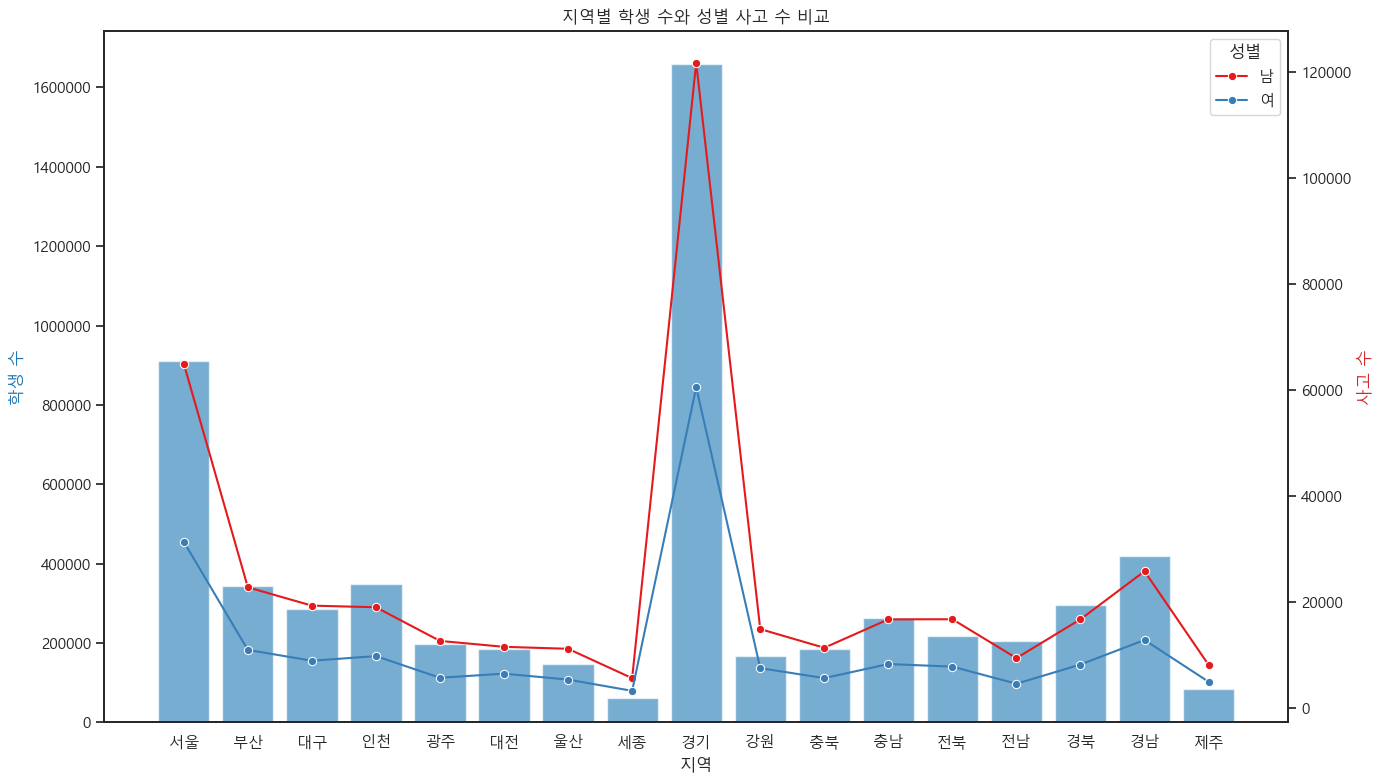

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, ax1 = plt.subplots(figsize=(14, 8))

# 학생 수를 막대그래프로 시각화
ax1.set_title('지역별 학생 수와 성별 사고 수 비교')
ax1.set_xlabel('지역')
ax1.set_ylabel('학생 수', color='tab:blue')
ax1.bar(region, total_student, color='tab:blue', alpha=0.6, label='학생 수')
plt.ticklabel_format(style='plain', axis='y')

# 두번째 축을 생성하여 남녀 각각의 사고 수를 선그래프로 시각화
ax2 = ax1.twinx()
ax2.set_ylabel('사고 수', color='tab:red')

sns.lineplot(x='지역', y='사고 수', hue='성별', marker='o', data=region_mf, ax=ax2, palette='Set1')
ax1.set_xticks(range(len(region)))

fig.tight_layout()
plt.show()

----
지역별로 남녀 각각의 사고 발생 건수를 선그래프로 시각화하고, 각 지역의 총 학생 수를 막대그래프로 나타내어, 각 지역의 총 학생 수와 사고 발생 수의 관계를 확인하고자 한다.

그래프를 보면, 학생 수를 나타내는 막대그래프와 사고 수를 나타내는 선그래프가 비슷한 형태로 나타나고 있음을 알 수 있다. 이는 각 지역의 사고 발생 수가 지역적 특성에 따른 것이 아닌, 해당 지역의 전체 학생 수에 영향을 받는다는 것을 시사한다.

이러한 결과는 학생 수가 많은 지역일수록 사고 발생 건수도 많다는 것을 보여주며, 이는 각 지역의 인구 밀도가 사고 발생 건수에 큰 영향을 미친다는 것을 의미한다.

따라서, 각 지역의 학생 수와 사고 수 간의 상관관계를 보다 명확하게 파악하기 위해 아래의 코드를 통해 분석을 진행하였다.

----

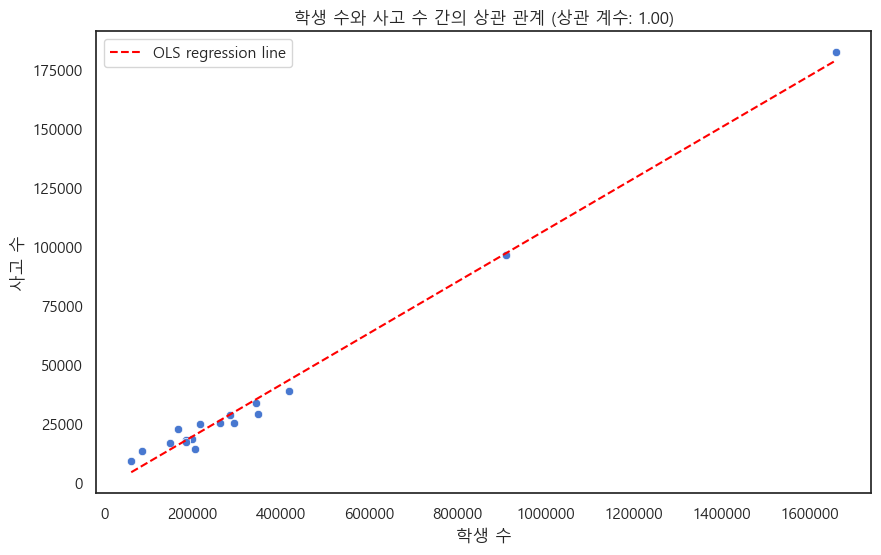

학생 수와 사고 수 간의 상관 계수: 1.00


In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# 지역을 기준으로 그룹화하여, 각 지역의 사고 수를 구함
region_accidents = region_mf.groupby('지역')['사고 수'].sum().reset_index()


# 지역과 해당 지역의 총 학생 수가 담긴 데이터프레임 생성
students_df = pd.DataFrame({
    '지역': region,
    '학생 수': total_student
})

# 각 지역과 해당 지역의 사고 수가 담긴 데이터와, 각 지역과 해당 지역의 학생 수가 담긴 데이터를 지역을 기준으로 병합
merged_df = pd.merge(region_accidents, students_df, on='지역')

# 상관계수 계산
correlation = merged_df['사고 수'].corr(merged_df['학생 수'])

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='학생 수', y='사고 수', data=merged_df)
plt.title(f'학생 수와 사고 수 간의 상관 관계 (상관 계수: {correlation:.2f})')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('학생 수')
plt.ylabel('사고 수')

# OLS 선 그리기 
slope, intercept, _, _, _ = linregress(merged_df['학생 수'], merged_df['사고 수'])
x_values = np.array([merged_df['학생 수'].min(), merged_df['학생 수'].max()])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', linestyle='--', label='OLS regression line')

plt.legend()
plt.show()

print(f'학생 수와 사고 수 간의 상관 계수: {correlation:.2f}')

----
이 분석을 통해 각 지역의 학생 수와 사고 수 간의 상관 관계를 시각화하고, 상관 계수를 계산하여 두 변수 간의 관계를 정량적으로 평가할 수 있었다. 각 지역에서 학생 수와 사고 수의 상관 계수가 1로 나타났다. 이것은 특정 지역에서 학생 수가 많을수록 해당 지역의 사고 수도 많다는 것을 나타내며, 학생 수가 증가함에 따라 사고 발생 가능성도 높아진다는 것을 의미한다.

결론적으로, 각 지역의 총 학생 수와 사고 수 간의 상관 관계가 매우 크다는 것을 알 수 있다. 즉, 인구가 많은 지역일수록 사고 발생 건수도 그만큼 많이 발생하는 경향이 있다. 이는 학생 수에 비례한 사고 예방과 안전 관리가 더욱 필요함을 시사한다. 특히, 인구가 많은 지역에서는 학생들이 밀집된 환경에서 생활하고 활동하므로, 보다 체계적이고 강화된 안전 관리와 예방 조치가 필수적이다. 또한, 이러한 지역에서는 추가적인 안전 교육 프로그램과 자원을 투입하여 학생들의 안전 의식을 높이고 사고 발생을 최소화할 필요가 있다. 지역별 특성에 맞춘 맞춤형 안전 대책을 마련함으로써, 보다 효과적으로 사고를 예방할 수 있을 것이다.

----

### **결론**

지역과 해당 지역의 사고 발생 수에 대한 분석을 통하여 다음과 같은 인사이트를 도출할 수 있다.

1. 특정 지역에서 학생 수가 많을수록 해당 지역의 사고 발생 수도 많은 것으로 나타났다. 이는 학생 수가 증가함에 따라 사고 발생 가능성도 높아질 수 있다는 것을 의미한다. 학생 수가 많은 지역에서는 대규모 안전 교육을 계획하고, 사고 발생률이 높은 특정 지역에서는 특별 집중 교육을 실시하는 등의 노력이 필요하다.
   
2. 안전사고 예방을 위해 자원을 배분할 때는 학생 수가 더 많은 지역의 학교에 더 많은 자원을 투입해야 한다. 해당 지역의 학교에는 더 많은 안전 교육 프로그램을 도입하고, 안전 인프라를 강화할 필요가 있다. 이를 통해 학생들의 안전을 효과적으로 보호하고 사고 발생을 줄일 수 있을 것이다.
   
3. 학생 수에 비해 사고 수가 이례적으로 높은 지역이 있다면, 해당 지역은 특별한 주의가 필요할 수 있다. 이는 해당 지역의 도로 환경이나 기타 요인들이 다른 지역에 비해 안전하지 않을 수 있음을 나타낸다. 학생들의 등하굣길처럼, 학교 내에서뿐만 아니라 학교 외부에서 발생할 수 있는 안전사고를 예방하기 위한 환경을 조성해야 한다. 예를 들어, 눈이 많이 내리는 지역에서는 미끄럼 방지 포장재나 제설제 등을 이용하여 등하굣길에서의 낙상 등의 사고 발생률을 줄일 수 있을 것이다.
   
4. 학생 수가 많음에도 불구하고 사고 수가 상대적으로 적은 지역이 있다면, 이는 해당 지역에서 시행 중인 학생 안전 프로그램이 효과적일 수 있음을 시사한다. 이러한 프로그램들을 다른 지역에도 공유하고, 도입함으로써 사고 발생률을 낮추는 것을 기대할 수 있다.

5. 지역의 병원, 소방서 등과 협력하여 응급 상황 시 신속하게 대응할 수 있도록 하는 등, 지역 자원을 활용할 수 있도록 학교와 지역 사회와의 협력을 강화하여야 한다.

이처럼, 각 지역의 특성에 맞춘 맞춤형 안전 대책을 마련함으로써 학생들의 안전을 효과적으로 보장할 수 있을 것이다.

----

# **Ⅳ. 활용방안 및 기대효과**

## **결론 및 활용방안**

### **결론**

본 분석을 통해 2019년부터 2023년까지 수집된 학교 안전사고 데이터를 기반으로 주요 사고 패턴을 파악하였다. 월별, 요일별, 시간별, 장소별로 사고 발생 경향을 분석하고, 성별 및 학교급별 사고 발생 특성을 살펴봄으로써 다음과 같은 중요한 인사이트를 도출할 수 있었다.

1. 연·월별 사고 발생 경향 :

   - 매년 방학 기간인 1월, 2월, 7월, 8월에 사고 발생 수가 적게 나타나는 경향이 확인되었다. 방학 기간에는 학생들이 학교에 없거나 학교에 머무는 시간이 적기 때문에, 사고 발생이 적게 나타나는 것이 자연스러운 현상으로 보인다.
   - 코로나19 팬데믹 시기인 2020년에 사고 발생 수가 급격히 감소하였으나, 2021년 부터 점차 학교 운영이 정상화됨에 따라 사고 발생 수가 다시 증가하는 추세를 보였다.
   - AR 모델을 이용하여 최근 2년간의 데이터를 바탕으로 향후 1년간의 사고 발생 건수를 예측한 그래프를 그린 결과, 이후 1년 동안에도 사고 발생 수가 늘어날 것이라는 예측 결과가 나왔다. 이러한 예측 모델을 통해 향후 사고 발생 건수를 예측함으로써, 사고 발생 가능성이 높은 시기에 대한 대비책을 미리 마련할 수 있다. 예를 들어, 사고 발생이 예상되는 시기에 인력을 추가 배치하거나, 필요한 안전 장비를 미리 확보하여 사고 발생을 줄일 수 있을 것이다.
  
<t>

2. 요일별 사고 발생 경향 :
   
   - 주중(월~금)에는 사고 발생 수가 일정하게 높았고, 주말(토, 일)에는 현저히 낮았다. 이는 주말보다 주중에 학생들이 학교에 주로 있기 때문에 사고 발생이 많이 발생하는 자연스러운 현상으로 보인다.
   - 요일에 관계없이 체육활동 시간에 사고 발생이 가장 많았으며, 식사 시간, 수업 시간, 쉬는 시간에도 사고가 빈번히 발생하였다.
   - 특정 요일에 사고가 집중되는 명확한 패턴은 발견되지 않았다, 이는 학교 내에서 요일별로 큰 차이 없이 일관되게 사고가 발생하고 있음을 시사한다. 따라서, 요일별로 특별한 예방 조치를 취할 필요는 없어 보이며, 전체적인 안전 대책을 강화하는 것이 중요하다.
   - 화요일과 목요일에 상대적으로 사고가 많이 발생하는 경향이 있었다. 이러한 현상의 원인을 구체적으로 분석하기 위해서는 추가적인 데이터와 정보가 필요하다. 예를 들어, 체육 수업이 주로 특정 요일에 집중되어 있거나, 학교 행사가 특정 요일에 주로 열리는 경우 해당 요일에 사고 발생 빈도가 높아질 수 있다. 이를 바탕으로 요일별 사고 예방 대책을 마련할 필요가 있다.

<t>
   

3. 계절별 사고 발생 경향 :

   - 봄과 가을 : 학기가 시작함에 따라 활동이 활발해지고, 학교 행사가 많아지면서 사고 발생이 증가한다.
   - 여름 : 방학으로 인해 전체 사고 발생 건수는 적지만, 방과 후 교실 활동 등 방학 중 참여하는 수업 시간에서의 사고 비율이 높게 나타난다.
   - 겨울 : 여름과 마찬가지로 방학으로 인해 상대적으로 전체 사고 발생 건수가 적다. 하지만, 다른 계절보다 낙상 사고의 비율이 높게 나타난다. 또한, 등하굣길에서의 사고 발생 비율이 다른 계절보다 더 높게 나타나는 경향이 있다.
   - 계절과 상관없이 모든 계절에서 물리적힘 노출에 의한 사고와 낙상 사고가 주요 사고 형태로 나타난다.
   - 손 부위와 구기운동, 물리적힘 노출의 연관성이 높게 나타난다. 이는 구기운동 중 손을 보호할 필요성이 있음을 의미한다.
   - 또한, 낙상사고와 발 부상의 연관성이 높게 나타난다. 낙상 사고로 인한 발 부상을 예방할 수 있도록 발을 보호할 수 있는 신발을 착용하도록 권장하고, 학교 시설 내 미끄러짐 방지 조치를 강화해야 한다.
   - 겨울철에는 보행/주행 중 낙상사고가 다른 계절보다 높은 비율로 발생하므로, 겨울철 보행에 대한 안전 교육을 실시하여 학생들이 이에 대한 경각심을 가질 수 있도록 해야 한다.

<t>

4. 장소별 사고 발생 경향 :
   
   - 운동장과 부속시설에서 사고가 가장 많이 발생하였으며, 교실과 통로에서도 상당히 많은 사고가 발생하였다. 체육활동 시간에 가장 많은 사고가 발생한다는 것을 앞서 확인하였다. 따라서, 체육활동 시에 사용되는 공간인 부속시설, 운동장에서 사고가 빈번하게 일어나는 것은 일관된 결과이다.
   - 교실에서는 수업 시간과 휴식 시간, 청소시간에 물리적힘 노출 사고가 가장 많이 발생하였고, 그 뒤를 이어 낙상 사고가 주로 발생하였다. 물리적힘 노출 사고는 주로 장난/놀이에 의해 많이 발생하는 것으로 나타났으므로, 수업 시간에 과도한 장난을 치지 못하도록 지도를 해야 할 필요가 있다. 또한, 날카로운 물건에 의한 사고도 빈번하게 발생하였으므로, 위험할 수 있는 물건을 다루어야 하는 수업 시간 전에는 그 위험성을 재차 강조하여 학생들이 경각심을 갖도록 해야 한다. 더불어, 낙상사고를 예방하기 위해 교실 내 바닥 상태를 주기적으로 점검해야 한다.
   - 교외에서는 학교 행사와, 등하교 중에 가장 많은 사고가 발생하였다. 등하교 중에는 낙상 사고가 가장 많이 발생하였으며, 학교행사 중에는 낙상 사고가 가장 많이 발생하였고, 물리적힘 노출에 의한 사고도 상당수 발생하였다. 등하교 시간 동안 학생들의 낙상 사고를 방지하기 위해, 미끄럼 방지 포장재 등을 사용하여 등하굣길의 안전을 강화해야 한다. 또한, 위험 요소가 많은 길로는 다니지 못하도록 지도가 필요하다. 더불어, 교외에서 진행하는 학교 행사 및 특별활동 동안 관리·감독을 강화해야 한다.
   - 운동장과 부속시설에서는 비슷한 형태로 사고가 발생하는 것으로 나타났다. 두 장소에서 모두 체육활동 시간에 가장 많은 사고가 발생하였다. 특히, 물리적힘 노출과 낙상에 의한 사고가 가장 많이 발생하였다. 또한, 식사 시간에도 낙상 사고와 물리적 접촉 사고가 빈번하게 발생하였다. 이는, 식사 전후의 자유 시간에 운동장과 부속시설에서 운동을 하는 학생들이 많기 때문인 것으로 파악할 수 있다. 운동장과 부속시설에서의 사고 발생은 체육활동 시간 만에 국한된 것이 아니라, 다양한 시간에 사고가 빈번하게 발생함을 알 수 있다. 운동(놀이)용 장비 사용에 의한 사고가 많이 발생하므로, 장비의 상태를 주기적으로 점검하고, 장비 사용 시 안전 수칙에 대한 교육을 정기적으로 해야 한다.
   - 통로에서는 보행/주행 중 낙상사고와 물리적힘 노출 사고가 빈번하게 발생하였다. 주로 문·창문·바닥·벽 등에 의해 사고가 발생하는 것으로 나타났다. 특히 쉬는 시간과 식사 시간에 주로 발생하였으며, 등하교 시간과 청소 시간에도 통로에서 상당수의 낙상 사고가 발생하였다. 통로에서 일어나는 낙상사고 및 물리적힘 노출사고를 방지하기 위해 학생들이 뛰지 않도록 지도하고, 보행/주행 중 안전 수칙에 대해 주기적으로 교육해야 한다. 청소 시간(쉬는 시간에 포함)에는 특히 물걸레질로 인해 바닥이 미끄러울 수 있으므로, 학생들에게 주의를 주어야 한다. 통로에서는 낙상 사고가 빈번하게 일어나므로, 바닥 상태를 정기적으로 점검하고 미끄럼 방지 처리를 해야 한다. 더불어, 보행/주행 중 사고를 유발할 수 있는 물건이 통로에 방치되지 않도록 주기적으로 점검하고 정리해야 한다.
  
<t>

5. 학교 급별 사고 발생 경향 :
   
   - 단순하게 사고 발생 건수를 비교하면 인구 수의 영향을 배제할 수 없기 때문에 정확한 사고 위험성을 판단하기 어렵다. 그렇기 때문에, 단순히 발생 건수를 비교하는 것보다 인구 대비 사고 발생률을 비교하는 것이 더 적절하다고 판단하였다. 인구 대비 사고 발생률을 계산함으로써 각 학급별로 학생 한 명당 사고 발생 위험을 더 명확하게 평가할 수 있었다. 사고 발생률은 사고 수를 인구수로 나눈 값으로, 인구 수의 영향을 배제한 상태에서 각 학교급의 사고 위험성을 평가할 수 있다. 각 학교급에 따른 사고 시간별 사고 비율에 대한 분석 결과는 다음과 같다.<br><br>
   - 고등학교에서는 체육활동(40.1%)과 식사 시간(17.2%) 동안 사고 발생 비율이 높다. 체육활동에서의 사고 비율이 높게 나타나는 이유는, 고등학생들이 참여하는 체육활동이 다른 학교급보다 더 고강도이거나 더 다양한 스포츠를 포함하기 때문일 수 있다. 또한, 체육활동 중 발생하는 신체 접촉과 운동 강도가 높을 수 있기 때문에 사고 발생 위험이 증가할 수 있다.
   - 기타학교에서는 체육활동(26.8%)과 쉬는 시간(16.3%), 식사 시간(13.9%) 동안 사고 발생 비율이 높다. 학생들이 자유롭게 활동할 수 있는 시간대에 사고가 빈번하게 발생하는 경향이 보인다.
   - 유치원에서는 수업 시간(54.4%) 동안 사고 발생 비율이 압도적으로 높다. 이는 유치원생들의 활동량이 많고 주의력이 낮아 발생하는 사고가 많음을 반영하는 결과이다.
   - 중학교에서는 체육활동(44.1%)과 식사 시간(16.2%), 쉬는 시간(14.3%) 동안 사고 발생 비율이 높다. 이는 기타학교와 유사한 경향을 보인다. 체육활동 중 안전 장비 착용과 식사시간 동안의 안전 관리가 필요하다.
   - 초등학교에서는 체육활동(30.3%)과 식사 시간(20.7%), 쉬는시간(18.2%) 동안 사고가 많이 발생한다. 수업 시간에도 사고가 빈번하므로, 이 시간대에 대한 안전 교육과 관리가 필요하다.
   - 특수학교에서는 수업 시간(34.7%)과 식사 시간(14.6%), 체육활동(14.4%) 동안 사고 발생 비율이 높게 나타난다. 특수학교에서는 다양한 시간에서 사고가 상당수 발생하므로, 모든 시간대에 걸쳐 적절한 안전 조치가 필요하다.<br><br>
   - 대부분의 학교 급에서 체육활동 중 사고 발생 비율이 높게 나타난다. 이는 체육활동 시 안전 장비 착용 및 안전 교육 강화가 필요함을 시사한다.
   - 초등학교, 중학교, 고등학교에서는 식사 시간 중 사고 발생 비율이 15% 이상으로 상대적으로 높다. 학생들이 식사 중 과도한 장난을 치지 못하도록 주의를 주어야 하며, 식사 중뿐만 아니라 식사 전후의 쉬는 시간에도 안전에 유의할 수 있도록 지도해야 한다.
   - 유치원에서 수업시간 중 사고 비율이 가장 높게 나타난다. 유치원생들의 활동량이 많고 주의력이 낮아 발생할 수 있는 사고를 예방하기 위한 안전 대책 수립이 필요하다.
   - 특수학교의 경우 수업시간, 식사시간, 체육활동에서 사고가 가장 빈번하게 일어나지만, 다른 시간대에도 적지 않게 사고가 발생한다. 이는 특수학교에서의 전반적인 안전 관리 강화가 필요하다는 것을 의미한다.
  
<t>
  
6. 지역과 사고 발생수의 관계 :

   - 각 지역의 총 학생 수와 사고 수의 상관 계수가 1로 나타나, 두 변수 간의 매우 강한 상관관계를 보여주었다. 즉, 인구가 많은 지역일수록 사고 발생 건수도 그만큼 많이 발생하는 경향이 있다는 것을 의미한다. 이는 학생 수에 비례한 사고 예방과 안전 관리가 더욱 필요함을 시사한다. 특히, 인구가 많은 지역에서는 학생들이 밀집된 환경에서 생활하고 활동하므로, 보다 체계적이고 강화된 안전 관리와 예방 조치가 필수적이다. 따라서 안전 사고 예방을 위해 자원을 배분할 때는 학생 수가 더 많은 지역의 학교에 더 많은 자원을 투입해야 한다. 해당 지역의 학교에는 더 많은 안전 교육 프로그램을 도입하고, 안전 인프라를 강화할 필요가 있다. 이를 통해 학생들의 안전을 효과적으로 보호하고 사고 발생을 줄일 수 있을 것이다.
   - 학생 수가 많음에도 불구하고 사고 수가 상대적으로 적은 지역은 효과적인 학생 안전 프로그램이 시행되고 있을 가능성이 높다. 이러한 프로그램을 다른 지역에도 도입하여 사고 발생률을 낮출 수 있을 것이다.
   - 학생 수에 비해 사고 수가 이례적으로 높은 지역이 있다면, 해당 지역은 특별한 주의가 필요하다. 이는 해당 지역의 도로 환경이나 기타 요인들이 다른 지역에 비해 안전하지 않을 수 있음을 의미한다. 학생들의 등하굣길처럼, 학교 내부에서뿐만 아니라 학교 외부에서 발생할 수 있는 안전사고를 예방하기 위한 환경을 조성해야 한다. 예를 들어, 눈이 많이 내리는 지역에서는 미끄럼 방지 포장재나 제설제 등을 이용하여 등하굣길에서의 낙상 등의 사고 발생률을 줄일 수 있을 것이다.

### **활용방안**

1. 예측 모델을 활용한 사고 예방 :

   - AR 모델을 통해 예측된 사고 발생 시기에 대비하여, 해당 기간 동안 안전 인력을 추가 배치하고, 필요한 안전 장비를 미리 확보하여 사고 발생을 줄일 수 있을 것이다.
   - 사고 예측 데이터를 활용하여 학생들과 교직원들에게 사전에 경고 및 교육을 실시하여 사고 예방에 기여할 수 있을 것이다.
   - 예측 모델의 정확도를 지속적으로 평가하고 개선하여, 보다 정확한 사고 예측이 가능하도록 한다.

<t>

2. 안전 교육 강화 및 맞춤형 프로그램 도입 :
   
   - 사고 발생 경향을 바탕으로 맞춤형 안전 교육 프로그램을 개발하고 시행해야 한다. 예를 들어, 체육활동 중 사고가 빈번한 학교에서는 체육 시간 전후로 안전 교육을 강화하고, 체육활동 중 사용하는 장비 및 시설의 안전 점검을 정기적으로 실시해야 한다.
   - 학생들이 주로 사고를 당하는 장소인 운동장과 부속시설에 대한 안전 점검을 철저히 수행해야 한다.
   - 계절별로 특화된 안전 교육을 실시하여, 학생들이 계절별 사고 위험성에 대해 인지할 수 있도록 해야 한다. 예를 들어, 겨울철에는 등하교 시 낙상사고 예방을 위한 교육을 강화해야 한다.

<t>
    
3. 예방적 인프라 구축 :
   
   - 학생 수가 많은 지역의 학교에 추가적인 안전 인프라를 설치한다. 예를 들어, 낙상 사고를 예방하기 위해 미끄럼 방지 바닥재를 설치하고, 위험 지역에 대한 경고판을 설치하는 등 인프라를 구축함으로써 사고 발생률을 줄일 수 있을 것이다.
   - 체육활동 중 사고가 가장 많이 발생하므로, 사고를 줄이기 위해 운동장과 부속시설(체육관)에 안전 매트와 같은 보호 장비를 비치하고, 체육활동 시 보호 장비 착용을 의무화해야 한다.
   - 낙상사고가 자주 발생하는 통로와 교실의 바닥 상태를 주기적으로 점검하고, 위험 요소가 없는지 확인하여 사고를 예방해야 한다.
   - 학교 건물의 구조적 안전성을 정기적으로 점검하여, 노후화된 시설로 인한 사고를 미연에 방지한다.

<t>
    
4. 사고 데이터 기반의 자원 배분 :
   
   - 학교별, 지역별 사고 데이터를 분석하여 자원을 효율적으로 배분한다. 사고 발생률이 더 높은 학교에는 더 많은 예산을 투입하여 안전 장비나 시설을 보강하고, 추가적인 안전 인력을 배치해야 한다.
   - 학생 수가 많음에도 사고 발생률이 낮은 학교의 우수 사례를 벤치마킹하여 다른 학교와 공유하고 적용할 수 있다.
   - 사고 데이터 분석을 통해 특정 시간대나 요일에 사고 발생이 집중되는 경우, 해당 시간대에 추가적인 안전 인력을 배치하는 등의 조치를 취한다.

<t>
    
5. 지역 사회와의 협력 강화 :
   
   - 학교 내부에서뿐만 아니라 학교 외부에서 발생하는 안전 사고를 예방하기 위해 지역 사회와 협력해야한다. 예를 들어, 지역 경찰과 협력하여 학교 주변의 교통 안전을 강화하고, 지역 주민들과 협력하여 더 안전한 등하교 환경을 조성할 수 있을 것이다.
   - 지역의 병원, 소방서 등과 협력하여 응급 상황 시 신속하게 대응할 수 있도록 하는 등, 지역 자원을 활용할 수 있도록 학교와 지역 사회와의 협력을 강화하여야 한다.

## **기대효과**

1. 안전사고 예방 및 감소 :

   - 맞춤형 안전 교육과 인프라 확충을 통해 학교 내외에서 발생할 수 있는 안전사고를 예방하고, 사고 발생률을 감소시킬 수 있을 것이다.
   - 학생들의 안전 의식이 향상되어 스스로 사고를 예방하려는 노력이 강화될 것이다.
   - AR 모델을 통해 예측된 사고 발생 시기에 대비하여, 해당 기간 동안 안전 인력과 필요한 안전 장비를 미리 확보하여 사고 발생을 줄일 수 있을 것이라 기대된다. 더불어, 예측된 데이터를 바탕으로 학생들과 교직원들에게 사전에 경고 및 교육을 실시하여 사고 예방에 기여할 수 있을 것이다.
   - 특정 사고 유형 및 장소에 대한 집중적인 예방 조치가 가능해질 것이며, 이는 사고 발생 가능성을 줄이는 데 도움이 될 것이다.
   - 계절별, 시간대별 사고 발생 패턴을 기반으로 한 맞춤형 대책을 통해 보다 정교하고 효과적인 사고 예방이 이루어질 것이다.

<t>

2. 학생 및 학부모의 학교 안전에 대한 신뢰도 향상 :
   
   - 체계적인 안전 대책 마련과 시행을 통해 학생과 학부모의 학교의 안전에 대한 신뢰도가 향상될 것이고, 이는 학교생활에 대한 만족도 증가로 이어질 수 있을 것이다.
   - 안전한 학교 환경 조성으로 학부모들의 불안감을 줄이고, 학생들의 학습 환경이 개선될 것이다.
   - 학생들이 안심하고 학습과 활동에 집중할 수 있는 환경이 조성되어, 전반적인 교육 성과 향상도 기대할 수 있다.

<t>

3. 효율적인 자원 배분 :

   - 분석 결과를 바탕으로 자원을 효율적으로 분배함으로써, 안전사고 예방에 필요한 자원을 적재적소에 활용할 수 있다. 이는 예산 절감과 함께 보다 효과적인 사고 예방을 가능하도록 할 것이다.
   - 학교의 특정 사고 다발 지역 및 시간대에 자원을 집중 투입하여 예방 효과를 극대화할 수 있다.
   - 자원 배분의 우선순위를 명확히 하여, 한정된 예산 내에서 최대한의 예방 효과를 거둘 수 있을 것이다.
  
<t>
     
4. 데이터 기반의 지속적인 개선 :

   - 사고 데이터 분석을 통해 지속적으로 개선점을 도출하고, 실질적인 안전 대책을 마련함으로써, 학교 안전 관리의 수준을 향상시킬 수 있을 것으로 기대된다. 데이터 기반의 의사결정은 보다 신뢰성 있는 대책 수립을 가능하게 해줄 것이다.
   - 예측 모델을 활용하여 미래 사고 발생 가능성을 사전에 파악하고, 이에 대비한 예방 조치를 미리 준비할 수 있을 것이다.
   - 정기적인 데이터 분석과 평가를 통해 기존 대책의 효과를 검증하고, 필요한 경우 즉각적으로 수정 및 보완할 수 있을 것이다.
   - 다양한 사고 유형 및 발생 원인에 대한 체계적인 분석을 통해, 학교 안전 정책에 대해 종합적인 접근이 가능해질 것이다.
  
<t>

5. 지역 사회와의 협력 강화 :

   - 지역 사회와의 협력을 통해 학교와 지역 주민 간의 유대가 강화되며, 안전이라는 공동의 목표를 달성할 수 있을 것이다. 이는 지역 전체의 안전 문화를 조성하는 데 기여할 것이다.
   - 지역 자원의 효과적인 활용으로, 학교 내외에서 발생하는 응급 상황 시 신속하고 정확한 대응이 가능해질 것이다.
   - 학교와 지역 병원, 소방서, 경찰서 간의 긴밀한 협력 체계를 구축하여, 비상시 신속하게 대응하고 피해를 최소화할 수 있다.
   - 학교와 지역 사회 간의 협력을 강화함으로써, 학생들의 안전을 위한 공동체 의식을 높이고, 더 나은 교육 환경을 조성할 수 있을 것이다.

위와 같은 활용방안 및 기대효과를 통해 학교 안전 사고 예방 및 대응 체계를 강화하여 학생들의 안전을 지키는 데 기여할 수 있을 것이다. 이로써 안전한 교육 환경을 제공하고, 학생들이 안심하고 학습할 수 있는 환경을 조성하는 데 한 걸음 더 다가갈 수 있다.